In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())
import pickle
from testsuite.utilities import Pareto_split
import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# plt.style.use('seaborn')
# import matplotlib.cm as cm
from testsuite.analysis import load_all, plot_pareto_2d, plot_all_pareto_2d, PLOT_STYLE, plot_measure

In [2]:
dir_path = os.path.join(rootpath.detect(), "experiments/wfg6_2obj/log_data")
result_dirs = os.listdir(dir_path)
result_dirs

['test_function_Saf_init10_MultiSurrogate_GP_ei',
 'test_function_Saf_init10_MultiSurrogate_GP_mean',
 'test_function_SmsEgo_init10_MultiSurrogate_GP_ei',
 'test_function_SmsEgo_init10_MultiSurrogate_GP_mean']

In [3]:
saf_ei_results = load_all(os.path.join(dir_path, result_dirs[0]))
saf_mu_results = load_all(os.path.join(dir_path, result_dirs[1]))
sms_ei_results = load_all(os.path.join(dir_path, result_dirs[2]))
sms_mu_results = load_all(os.path.join(dir_path, result_dirs[3]))

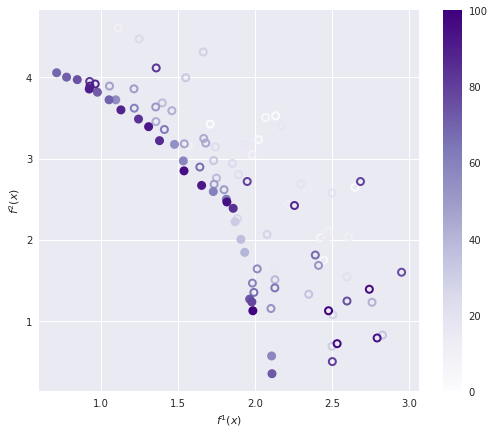

In [9]:
fig_safmu = plot_all_pareto_2d(saf_mu_results, plot_indices=[1, 2])

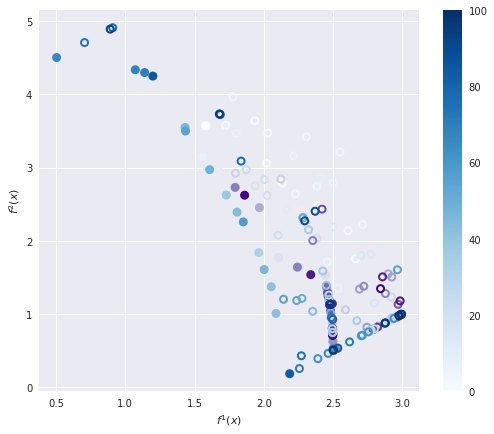

In [5]:
fig_safei = plot_all_pareto_2d(saf_ei_results, plot_indices=[1, 2])

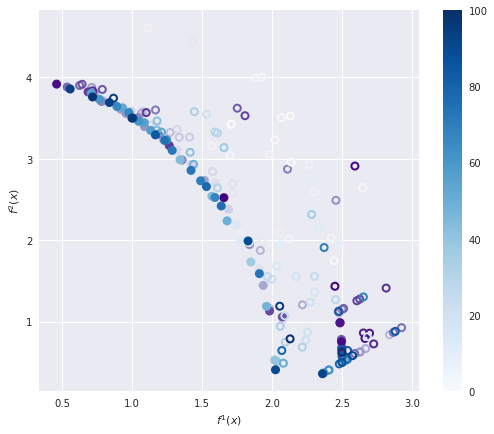

In [6]:
fig_smsmu = plot_all_pareto_2d(sms_mu_results, plot_indices=[1, 2])


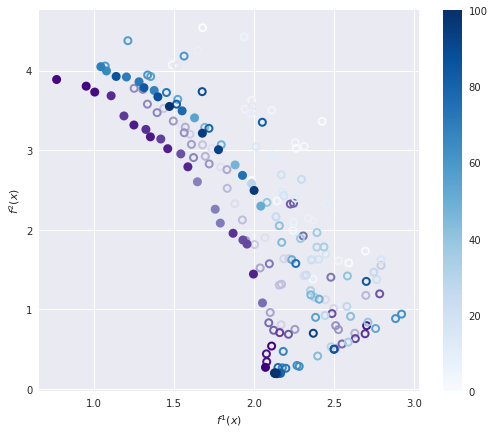

In [7]:
fig_smsmei= plot_all_pareto_2d(sms_ei_results, plot_indices=[1, 2])

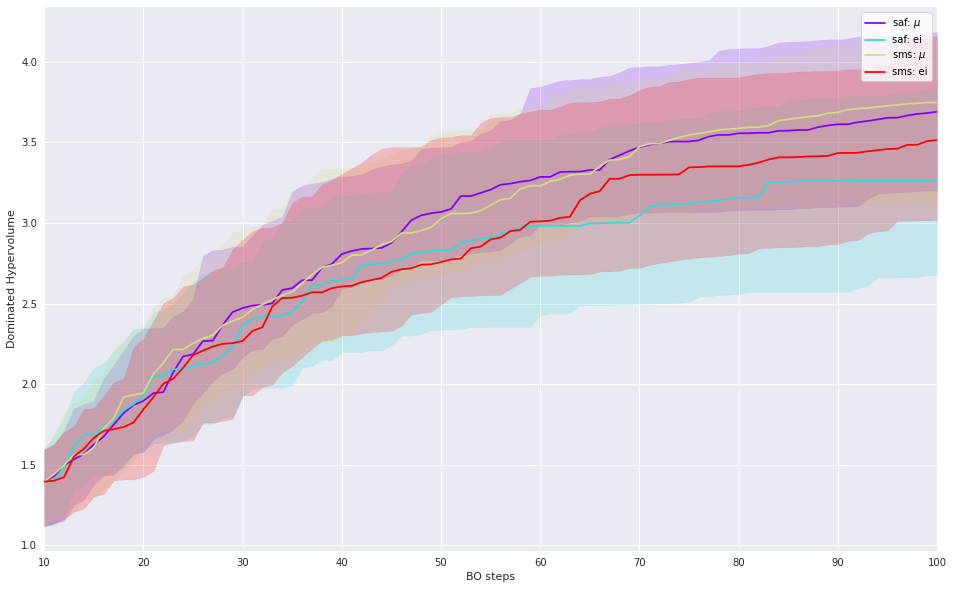

In [8]:
import matplotlib.pyplot as plt
with plt.style.context(PLOT_STYLE["plot_style"]):
    fig_hv = plt.figure(figsize=[16, 10])
    ax_hv = fig_hv.gca()

cmap = PLOT_STYLE['plot_cmap']
colors = cmap(np.linspace(0, 1, len(result_dirs)))

plot_measure(saf_mu_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="saf: $\mu$", color=colors[0])
plot_measure(saf_ei_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="saf: ei", color=colors[1])
plot_measure(sms_mu_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="sms: $\mu$", color=colors[2])
plot_measure(sms_ei_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="sms: ei", color=colors[3])
ax_hv.set_xlim([10, 100])
ax_hv.set_xlabel("BO steps")
ax_hv.set_ylabel("Dominated Hypervolume")
ax_hv.legend()

In [10]:
print(np.sum([len(errors) for errors in saf_ei_results["errors"]]), "\t",*[errors for errors in saf_ei_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in saf_mu_results["errors"]]), "\t",*[errors for errors in saf_mu_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in sms_ei_results["errors"]]), "\t",*[errors for errors in sms_ei_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in sms_mu_results["errors"]]), "\t",*[errors for errors in sms_mu_results["errors"] if len(errors)>0])

0 	
1 	 ['Error#02: Took 3 attempts to find unique solution at eval 12']
8 	 ['Error#02: Took 3 attempts to find unique solution at eval 97', 'Error#02: Took 2 attempts to find unique solution at eval 99'] ['Error#02: Took 3 attempts to find unique solution at eval 89', 'Error#02: Took 2 attempts to find unique solution at eval 93', 'Error#02: Took 2 attempts to find unique solution at eval 94', 'Error#02: Took 2 attempts to find unique solution at eval 97'] ['Error#02: Took 2 attempts to find unique solution at eval 87', 'Error#02: Took 3 attempts to find unique solution at eval 96']
12 	 ['Error#02: Took 2 attempts to find unique solution at eval 48', 'Error#02: Took 2 attempts to find unique solution at eval 57', 'Error#01: Failed to find unique new solution at eval 58', 'Error#02: Took 2 attempts to find unique solution at eval 59', 'Error#02: Took 2 attempts to find unique solution at eval 89', 'Error#02: Took 3 attempts to find unique solution at eval 90', 'Error#02: Took 2 attem

In [11]:
print([times for times in saf_ei_results["train_time"]])
print([times for times in saf_mu_results["train_time"]])
print([times for times in sms_ei_results["train_time"]])
print([times for times in sms_mu_results["train_time"]])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
from pymoo.factory import get_performance_indicator
import wfg

In [11]:
N=200

## establish objective function
kfactor = 1
lfactor = 2
M = 5 # number of "underlying positional parameters" +1 
k = kfactor*(M-1) # position related parameers (must be devisible by M-1)
l = lfactor*2 # distance-related parameters, muist be even for WFG2 & WFG3
l = 3

n_obj = 2 # must be from 1:M 
n_dim = l+k

x_limits = np.zeros((2, n_dim))
x_limits[1] = np.array(range(1,n_dim+1))*2

# fun = BM.wfg
fun =wfg.WFG6
args = [k, n_obj] # number of objectives as argument


y = np.zeros((N, n_obj))
for n in range(N):
    z = wfg.random_soln(k, l, fun.__name__)
    y[n,:] = fun(z, k, n_obj)

In [12]:
igdp = get_performance_indicator("igd+", y)

def extract_performance(z, indicator):
    ANS  = []
    for i in range(9, len(z)):
        ans = indicator.calc(z[:i])
        ANS.append(ans)

    return ANS

In [10]:
plt.scatter(y[:,0], y[:,1])

NameError: name 'y' is not defined

In [13]:
saf_mu_results['igd'] = [extract_performance(saf_mu_results["y"][i], igdp) for i in range(len(saf_mu_results["y"]))]
saf_ei_results['igd'] = [extract_performance(saf_ei_results["y"][i], igdp) for i in range(len(saf_ei_results["y"]))]
sms_mu_results['igd'] = [extract_performance(sms_mu_results["y"][i], igdp) for i in range(len(sms_mu_results["y"]))]
sms_ei_results['igd'] = [extract_performance(sms_ei_results["y"][i], igdp) for i in range(len(sms_ei_results["y"]))]

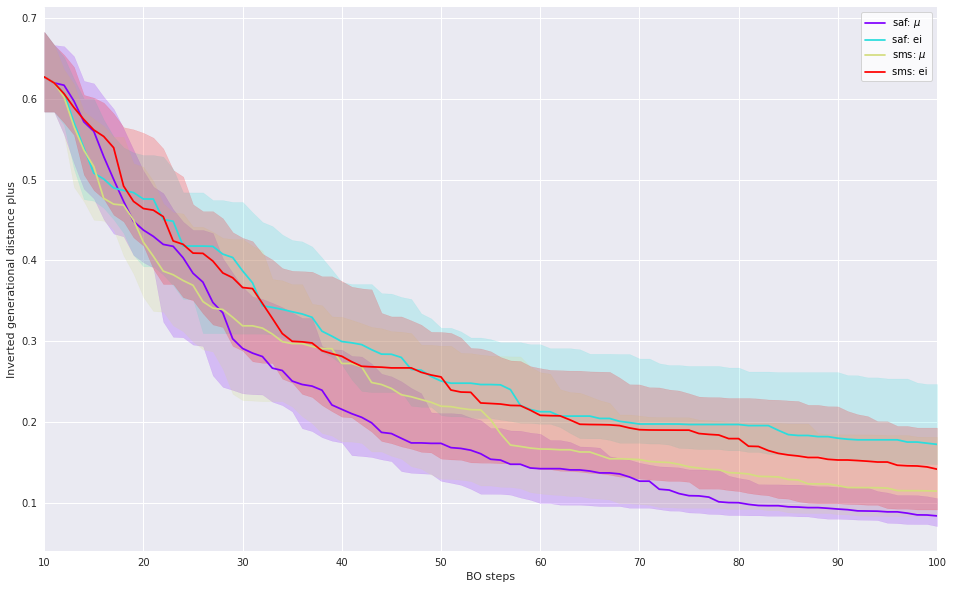

In [14]:
import matplotlib.pyplot as plt
with plt.style.context(PLOT_STYLE["plot_style"]):
    fig_hv = plt.figure(figsize=[16, 10])
    ax_hv = fig_hv.gca()

cmap = PLOT_STYLE['plot_cmap']
colors = cmap(np.linspace(0, 1, len(result_dirs)))

plot_measure(saf_mu_results, measure="igd", axis=ax_hv, plot_individuals=False, label="saf: $\mu$", color=colors[0])
plot_measure(saf_ei_results, measure="igd", axis=ax_hv, plot_individuals=False, label="saf: ei", color=colors[1])
plot_measure(sms_mu_results, measure="igd", axis=ax_hv, plot_individuals=False, label="sms: $\mu$", color=colors[2])
plot_measure(sms_ei_results, measure="igd", axis=ax_hv, plot_individuals=False, label="sms: ei", color=colors[3])
ax_hv.set_xlim([10, 100])
ax_hv.set_xlabel("BO steps")
ax_hv.set_ylabel("Inverted generational distance plus")
ax_hv.legend()

In [1]:
sms_mu_results["errors"][26]

NameError: name 'sms_mu_results' is not defined

In [29]:
sms_mu_results.keys()

dict_keys(['objective_function', 'limits', 'n_initial', 'seed', 'hypervolume', 'x', 'y', 'log_dir', 'log_filename', 'n_evaluations', 'budget', 'errors', 'train_time', 'igd'])

In [31]:
sms_mu_results["seed"][26]

17

In [32]:
x = sms_mu_results["x"][26]
y = sms_mu_results["y"][26]

In [34]:
from testsuite.surrogates import GP, MultiSurrogate

In [42]:
surr = MultiSurrogate(GP, scaled=True)

In [53]:
VARS = []
LENS = []
for i in range(10, 100):
    surr.update(x[:i],y[:i])
    VARS.append([surr.surrogates[0].model[0], surr.surrogates[1].model[0]])
    LENS.append([surr.surrogates[0].model[1], surr.surrogates[1].model[1]])

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 14.188985194595386
Optimization restart 2/10, f = 14.189385332047227
Optimization restart 3/10, f = 14.188985195292457
Optimization restart 4/10, f = 14.18898519459443
Optimization restart 5/10, f = 38391279.57063919
Optimization restart 6/10, f = 14.189385332047063
Optimization restart 7/10, f = 14.189385332046747
Optimization restart 8/10, f = 14.188985195020551


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 14.188985219058988
Optimization restart 10/10, f = 14.188985195348781
Optimization restart 1/10, f = 14.1893854703906
Optimization restart 2/10, f = 14.189385332046776
Optimization restart 3/10, f = 14.189385344951358
Optimization restart 4/10, f = 33.72506066913604
Optimization restart 5/10, f = 14.189385332047085
Optimization restart 6/10, f = 14.189385346527352
Optimization restart 7/10, f = 14.18938641209905


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 14.189385358731661
Optimization restart 9/10, f = 33.725090090150644
Optimization restart 10/10, f = 66.75406265689837
Optimization restart 1/10, f = 11.591243197632737
Optimization restart 2/10, f = 11.591243197628163
Optimization restart 3/10, f = 15.608323865251402
Optimization restart 4/10, f = 41.106520317969185
Optimization restart 5/10, f = 41.10651752642622
Optimization restart 6/10, f = 11.59124319761256
Optimization restart 7/10, f = 11.591243197613794
Optimization restart 8/10, f = 11.591243197613178
Optimization restart 9/10, f = 11.591243198514839


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 11.591243197615906
Optimization restart 1/10, f = 15.608323865251453
Optimization restart 2/10, f = 29.79928294643591
Optimization restart 3/10, f = 29.799274414457763
Optimization restart 4/10, f = 10.20466293668195
Optimization restart 5/10, f = 10.20466293668295
Optimization restart 6/10, f = 29.799279888476036


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 7/10, f = 10.204662936683743
Optimization restart 8/10, f = 15.608323865251402
Optimization restart 9/10, f = 10.204662936696469
Optimization restart 10/10, f = 10.204662936683238
Optimization restart 1/10, f = 12.120669613332215
Optimization restart 2/10, f = 80.10487518827804
Optimization restart 3/10, f = 12.120669613332504
Optimization restart 4/10, f = 12.120669613332268
Optimization restart 5/10, f = 12.120669613796501
Optimization restart 6/10, f = 12.120669613334


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 7/10, f = 12.120669613347427
Optimization restart 8/10, f = 12.12066961333495
Optimization restart 9/10, f = 12.12066961333517
Optimization restart 10/10, f = 12.120669613333117
Optimization restart 1/10, f = 8.180413751390036
Optimization restart 2/10, f = 8.1804137513949
Optimization restart 3/10, f = 8.180413751389208
Optimization restart 4/10, f = 27.986271361105548
Optimization restart 5/10, f = 8.180413751392969
Optimization restart 6/10, f = 8.1804137513879
Optimization restart 7/10, f = 8.1804137513932


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 17.027262398456898
Optimization restart 9/10, f = 17.027262398456074
Optimization restart 10/10, f = 8.180413751392678
Optimization restart 1/10, f = 13.322007196827785
Optimization restart 2/10, f = 13.322007196826988
Optimization restart 3/10, f = 13.322007196843291
Optimization restart 4/10, f = 43.56310368023547
Optimization restart 5/10, f = 13.32200719684375
Optimization restart 6/10, f = 13.322007196829997
Optimization restart 7/10, f = 71243733.67859185


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 13.322007196829805
Optimization restart 9/10, f = 18.446200931083737
Optimization restart 10/10, f = 13.32200719683004
Optimization restart 1/10, f = 6.655155001817997
Optimization restart 2/10, f = 86.78028145396787
Optimization restart 3/10, f = 37883261.053423636
Optimization restart 4/10, f = 6.6551550018310985
Optimization restart 5/10, f = 6.655155001817379
Optimization restart 6/10, f = 18.446200931660748
Optimization restart 7/10, f = 6.655155001807739
Optimization restart 8/10, f = 26.691801929838856


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 6.655155001822871
Optimization restart 10/10, f = 18.4462009301079
Optimization restart 1/10, f = 14.646297188992811
Optimization restart 2/10, f = 14.646297188994499
Optimization restart 3/10, f = 14.6462971889875
Optimization restart 4/10, f = 93.4556877196577
Optimization restart 5/10, f = 14.64629718898914
Optimization restart 6/10, f = 14.646297188996499


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 7/10, f = 14.646297188990225
Optimization restart 8/10, f = 14.646297189091937
Optimization restart 9/10, f = 19.86513946486545
Optimization restart 10/10, f = 14.64629718898771


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 5.937881927585117
Optimization restart 2/10, f = 93.4556877196577
Optimization restart 3/10, f = 19.865139464865415
Optimization restart 4/10, f = 93.4556877196577
Optimization restart 5/10, f = 5.937881927580143
Optimization restart 6/10, f = 5.937881927545641
Optimization restart 7/10, f = 5.937881927555763
Optimization restart 8/10, f = 5.937881927558077


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 19.865139238540678
Optimization restart 10/10, f = 5.937881927550992
Optimization restart 1/10, f = 15.958739818459863
Optimization restart 2/10, f = 15.958739818473695
Optimization restart 3/10, f = 21.28407799807009
Optimization restart 4/10, f = 15.95873981845947
Optimization restart 5/10, f = 15.958739818464519
Optimization restart 6/10, f = 15.95873981846486
Optimization restart 7/10, f = 21.28407799807006
Optimization restart 8/10, f = 48.56406553362133


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 15.958739818667137
Optimization restart 10/10, f = 100.13109398534753
Optimization restart 1/10, f = 6.790329418878407
Optimization restart 2/10, f = 100.13109398534753
Optimization restart 3/10, f = 100.13109398534753
Optimization restart 4/10, f = 6.790329418858281
Optimization restart 5/10, f = 100.13109398534753
Optimization restart 6/10, f = 6.790329418871824
Optimization restart 7/10, f = 27.993355452465746
Optimization restart 8/10, f = 6.790329418856499
Optimization restart 9/10, f = 6.790329418886293


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 27.99326698451896
Optimization restart 1/10, f = 17.284228493251334
Optimization restart 2/10, f = 17.284228493242807
Optimization restart 3/10, f = 17.28422849326938
Optimization restart 4/10, f = 49.01132122628552
Optimization restart 5/10, f = 106.8065002503932
Optimization restart 6/10, f = 17.284228493243837
Optimization restart 7/10, f = 106.80650025103739
Optimization restart 8/10, f = 22.703016531182527
Optimization restart 9/10, f = 17.28422849326786
Optimization restart 10/10, f = 106.80650025103739


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 7.1114696866913825
Optimization restart 2/10, f = 7.111469686688835
Optimization restart 3/10, f = 85016528.46305543
Optimization restart 4/10, f = 28.843591784437436
Optimization restart 5/10, f = 7.111469686684725
Optimization restart 6/10, f = 7.1114696866968075


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 7/10, f = 7.111469686682042
Optimization restart 8/10, f = 7.1114696866827725
Optimization restart 9/10, f = 7.111469686684417
Optimization restart 10/10, f = 22.703016531274766
Optimization restart 1/10, f = 18.654159404693686
Optimization restart 2/10, f = 18.654159404702618
Optimization restart 3/10, f = 199808138.90950188
Optimization restart 4/10, f = 18.654159404688365
Optimization restart 5/10, f = 18.654159404693026
Optimization restart 6/10, f = 113.48190651672722
Optimization restart 7/10, f = 18.65415940469536


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 52.20372949719857
Optimization restart 9/10, f = 18.65415940468881
Optimization restart 10/10, f = 18.654159404693395
Optimization restart 1/10, f = 8.268239260016024
Optimization restart 2/10, f = 113.48190651672722
Optimization restart 3/10, f = 8.268239260010052
Optimization restart 4/10, f = 113.48190651672722
Optimization restart 5/10, f = 24.121955064479437
Optimization restart 6/10, f = 8.268239260005215
Optimization restart 7/10, f = 8.268239259998705
Optimization restart 8/10, f = 8.26823926001352
Optimization restart 9/10, f = 8.268239260011658


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 8.268239260012122
Optimization restart 1/10, f = 19.990062991331307
Optimization restart 2/10, f = 19.990062991852923
Optimization restart 3/10, f = 19.990062991317444
Optimization restart 4/10, f = 54.769619673831265
Optimization restart 5/10, f = 19.990062991339784
Optimization restart 6/10, f = 120.15731278241705
Optimization restart 7/10, f = 54.76959361256443
Optimization restart 8/10, f = 54.76532804020498
Optimization restart 9/10, f = 19.990062991364418


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 19.990062991326518
Optimization restart 1/10, f = 8.304520282048935
Optimization restart 2/10, f = 8.304520281978181
Optimization restart 3/10, f = 120.15731278241705
Optimization restart 4/10, f = 8.304520282000809
Optimization restart 5/10, f = 8.304520281989477
Optimization restart 6/10, f = 29.504671655851837
Optimization restart 7/10, f = 8.304520282013437
Optimization restart 8/10, f = 8.304520281971318
Optimization restart 9/10, f = 899013.8326608143


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 128782822.36509186
Optimization restart 1/10, f = 21.667642749807545
Optimization restart 2/10, f = 26.959832130878787
Optimization restart 3/10, f = 21.66764274980847
Optimization restart 4/10, f = 21.66764274980322
Optimization restart 5/10, f = 21.66764274981376
Optimization restart 6/10, f = 21.667642749802347


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


Optimization restart 7/10, f = 21.66764274983674
Optimization restart 8/10, f = 948959.0455864145
Optimization restart 9/10, f = 21.667642749806745
Optimization restart 10/10, f = 26.959829733189235


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 8.49630303931894
Optimization restart 2/10, f = 8.496303039288048
Optimization restart 3/10, f = 30.34750622156312
Optimization restart 4/10, f = 8.496303039286547
Optimization restart 5/10, f = 8.496303039256443
Optimization restart 6/10, f = 8.496303039292652
Optimization restart 7/10, f = 126.8327184798248
Optimization restart 8/10, f = 948959.0455864148


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 8.496303039265891
Optimization restart 10/10, f = 8.496303039277047
Optimization restart 1/10, f = 23.1019021759637
Optimization restart 2/10, f = 23.10190217570727
Optimization restart 3/10, f = 23.10190217570507
Optimization restart 4/10, f = 23.1019021758179
Optimization restart 5/10, f = 324258580.18430966
Optimization restart 6/10, f = 23.1019021757134
Optimization restart 7/10, f = 324501141.1476297
Optimization restart 8/10, f = 23.101902175706506


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 23.10190217570677
Optimization restart 10/10, f = 23.1019021758184
Optimization restart 1/10, f = 13.286849150652333
Optimization restart 2/10, f = 183100260.74570212
Optimization restart 3/10, f = 13.28684915065647
Optimization restart 4/10, f = 133.50812531379674
Optimization restart 5/10, f = 13.286849150661041
Optimization restart 6/10, f = 13.286849150655202
Optimization restart 7/10, f = 13.286849150652165
Optimization restart 8/10, f = 28.37877066409373
Optimization restart 9/10, f = 133.50812531379674


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 13.286849150674602
Optimization restart 1/10, f = 24.368790326923193
Optimization restart 2/10, f = 24.368790326915956
Optimization restart 3/10, f = 140.18353157948656
Optimization restart 4/10, f = 24.368790326921022
Optimization restart 5/10, f = 24.368790326923072
Optimization restart 6/10, f = 140.18353157948656
Optimization restart 7/10, f = 29.79770919725673


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 8/10, f = 60.23363165835121
Optimization restart 9/10, f = 60.23363224156029
Optimization restart 10/10, f = 24.368790326920397


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 13.607914679368713
Optimization restart 2/10, f = 39.14929931117318
Optimization restart 3/10, f = 13.607914679399437
Optimization restart 4/10, f = 13.607914679374847
Optimization restart 5/10, f = 13.607914679389335
Optimization restart 6/10, f = 29.797709197300286


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 7/10, f = 179106456.78200325
Optimization restart 8/10, f = 29.797708820388742
Optimization restart 9/10, f = 29.797709197299845
Optimization restart 10/10, f = 13.60791467939183
Optimization restart 1/10, f = 25.9913840823461
Optimization restart 2/10, f = 25.991384082358707
Optimization restart 3/10, f = 25.99138408238116
Optimization restart 4/10, f = 146.8589378451764
Optimization restart 5/10, f = 31.216647730505922
Optimization restart 6/10, f = 146.8589378451764
Optimization restart 7/10, f = 146.8589378451764
Optimization restart 8/10, f = 146.8589378451764
Optimization restart 9/10, f = 1098794.6843632166


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 25.99138408236891
Optimization restart 1/10, f = 14.278244665713608
Optimization restart 2/10, f = 14.278244665734192
Optimization restart 3/10, f = 14.27824466572291
Optimization restart 4/10, f = 14.278244665702257
Optimization restart 5/10, f = 14.27824466568448
Optimization restart 6/10, f = 14.278244665745309
Optimization restart 7/10, f = 14.278244665732627
Optimization restart 8/10, f = 146.85893784439952


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 14.278244665707051
Optimization restart 10/10, f = 40.764572268681704
Optimization restart 1/10, f = 26.45033099065015
Optimization restart 2/10, f = 26.45033099065613
Optimization restart 3/10, f = 26.450330990917546
Optimization restart 4/10, f = 26.450330990668945
Optimization restart 5/10, f = 26.450330990617836
Optimization restart 6/10, f = 26.450330990650187
Optimization restart 7/10, f = 26.450330990634043
Optimization restart 8/10, f = 153.53434411086621
Optimization restart 9/10, f = 26.45033099068064


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 153.53434411086621
Optimization restart 1/10, f = 13.653486781873953
Optimization restart 2/10, f = 45.81951357129421
Optimization restart 3/10, f = 153.53434411086621
Optimization restart 4/10, f = 153.53434411086621
Optimization restart 5/10, f = 13.653486781913903
Optimization restart 6/10, f = 13.653486781897396
Optimization restart 7/10, f = 13.653486781870813


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 45.819571890186
Optimization restart 9/10, f = 13.653486781874406
Optimization restart 10/10, f = 258757038.28089085
Optimization restart 1/10, f = 27.59939574490729
Optimization restart 2/10, f = 27.599395744873934
Optimization restart 3/10, f = 27.599395744900406
Optimization restart 4/10, f = 65.02196036772652
Optimization restart 5/10, f = 160.2097503765561
Optimization restart 6/10, f = 27.599395744907845
Optimization restart 7/10, f = 434328744.9176686
Optimization restart 8/10, f = 34.05452479691577
Optimization restart 9/10, f = 160.2097503765561
Optimization restart 10/10, f = 34.05452476319904


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 14.02337077660733
Optimization restart 2/10, f = 160.2097503765561
Optimization restart 3/10, f = 14.023370776596309
Optimization restart 4/10, f = 14.023370776636082
Optimization restart 5/10, f = 14.023370776604775
Optimization restart 6/10, f = 14.023370776642253
Optimization restart 7/10, f = 46.67418573696157
Optimization restart 8/10, f = 14.02337077662741
Optimization restart 9/10, f = 14.02337077661981


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 14.023370776585896
Optimization restart 1/10, f = 28.898621455550312
Optimization restart 2/10, f = 1248630.3231400193
Optimization restart 3/10, f = 166.88515664224593
Optimization restart 4/10, f = 166.88515664224593
Optimization restart 5/10, f = 66.64756164509203
Optimization restart 6/10, f = 66.64752693903874
Optimization restart 7/10, f = 28.898621455590707
Optimization restart 8/10, f = 28.89862145557186
Optimization restart 9/10, f = 166.88515664224593


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 166.88515664224593
Optimization restart 1/10, f = 15.516685332203382
Optimization restart 2/10, f = 48.02588946321992
Optimization restart 3/10, f = 15.516685332133946
Optimization restart 4/10, f = 15.516685332144718
Optimization restart 5/10, f = 15.51668533217572
Optimization restart 6/10, f = 15.516685332135548
Optimization restart 7/10, f = 15.516685332104172


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 166.88515664224593
Optimization restart 9/10, f = 15.51668533211474
Optimization restart 10/10, f = 166.88515664224593
Optimization restart 1/10, f = 29.5689531318898
Optimization restart 2/10, f = 29.56895313190105
Optimization restart 3/10, f = 173.56056290793578
Optimization restart 4/10, f = 173.56056290793578
Optimization restart 5/10, f = 36.89240186332149
Optimization restart 6/10, f = 29.56895313198889
Optimization restart 7/10, f = 29.568953131903186
Optimization restart 8/10, f = 29.568953131894606
Optimization restart 9/10, f = 472005850.0559623


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 36.89240186332149
Optimization restart 1/10, f = 15.518073965805932
Optimization restart 2/10, f = 270646388.8281663
Optimization restart 3/10, f = 15.518073965790878
Optimization restart 4/10, f = 15.518073965797509
Optimization restart 5/10, f = 15.518073965754766
Optimization restart 6/10, f = 15.518073965781678
Optimization restart 7/10, f = 15.518073965737205
Optimization restart 8/10, f = 15.518073965780788
Optimization restart 9/10, f = 36.89240186332214


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 173.56056290793578
Optimization restart 1/10, f = 30.85969698287131
Optimization restart 2/10, f = 38.31134039652639
Optimization restart 3/10, f = 30.85969698292512
Optimization restart 4/10, f = 30.859696982886135
Optimization restart 5/10, f = 180.23596917362562
Optimization restart 6/10, f = 180.23596917362562
Optimization restart 7/10, f = 30.859696982987067
Optimization restart 8/10, f = 180.23596917362562
Optimization restart 9/10, f = 180.23596917362562
Optimization restart 10/10, f = 30.85969698299874


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 16.26626925442873
Optimization restart 2/10, f = 16.266269254380077
Optimization restart 3/10, f = 16.266269254372997
Optimization restart 4/10, f = 38.31134039562018
Optimization restart 5/10, f = 1348520.748991221
Optimization restart 6/10, f = 16.266269254353627
Optimization restart 7/10, f = 16.266269254362914


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 16.266269254406595
Optimization restart 9/10, f = 38.31134039652616
Optimization restart 10/10, f = 386100338.447254
Optimization restart 1/10, f = 32.59611999406566
Optimization restart 2/10, f = 32.596119994047456
Optimization restart 3/10, f = 32.59611999402857
Optimization restart 4/10, f = 1398465.9619168222
Optimization restart 5/10, f = 32.596119994178494
Optimization restart 6/10, f = 552765614.9855652
Optimization restart 7/10, f = 32.59611999412869
Optimization restart 8/10, f = 186.91137543931546


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 32.59611999408445
Optimization restart 10/10, f = 73.06275393807493
Optimization restart 1/10, f = 17.681440211734433
Optimization restart 2/10, f = 50.543793331197456
Optimization restart 3/10, f = 17.681440211755636
Optimization restart 4/10, f = 408482124.21944714
Optimization restart 5/10, f = 50.54378686925663
Optimization restart 6/10, f = 17.681440211761828
Optimization restart 7/10, f = 409220033.9649979


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


Optimization restart 8/10, f = 186.91137543931546
Optimization restart 9/10, f = 17.681440211751497
Optimization restart 10/10, f = 17.68144021177654


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 32.10243041486184
Optimization restart 2/10, f = 193.5867817050053
Optimization restart 3/10, f = 41.14921746293571
Optimization restart 4/10, f = 32.102430414839304
Optimization restart 5/10, f = 32.102430414961894
Optimization restart 6/10, f = 626914832.2864823
Optimization restart 7/10, f = 32.1024304149033
Optimization restart 8/10, f = 32.10243041489624
Optimization restart 9/10, f = 1448411.174842423

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance



Optimization restart 10/10, f = 32.10243041494376
Optimization restart 1/10, f = 17.08090682176104
Optimization restart 2/10, f = 17.08090682129454
Optimization restart 3/10, f = 193.5867817050053
Optimization restart 4/10, f = 17.080906821269746
Optimization restart 5/10, f = 17.08090682116712
Optimization restart 6/10, f = 433048118.16667217
Optimization restart 7/10, f = 17.080906821267728
Optimization restart 8/10, f = 17.08090682125001


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 17.08090682129526
Optimization restart 10/10, f = 17.080906821238635
Optimization restart 1/10, f = 33.048727524782215
Optimization restart 2/10, f = 33.048727524716455
Optimization restart 3/10, f = 200.26218797069515
Optimization restart 4/10, f = 33.04872752479926
Optimization restart 5/10, f = 75.31442666134281
Optimization restart 6/10, f = 33.04872752478691
Optimization restart 7/10, f = 33.04872752485942
Optimization restart 8/10, f = 33.04872752474082
Optimization restart 9/10, f = 33.04872752488049


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 33.048727524914526
Optimization restart 1/10, f = 18.011186406303622
Optimization restart 2/10, f = 51.037194409110185
Optimization restart 3/10, f = 18.01118640633579
Optimization restart 4/10, f = 18.011186406336513
Optimization restart 5/10, f = 18.01118640630002
Optimization restart 6/10, f = 18.011186406344248
Optimization restart 7/10, f = 18.011186406299746
Optimization restart 8/10, f = 18.011186406327916


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 18.011186406300787
Optimization restart 10/10, f = 18.01118640630062
Optimization restart 1/10, f = 34.23368797105385
Optimization restart 2/10, f = 34.2336879711399
Optimization restart 3/10, f = 43.98709452934485
Optimization restart 4/10, f = 34.2336879709867
Optimization restart 5/10, f = 34.233687971302274
Optimization restart 6/10, f = 34.2336879714602
Optimization restart 7/10, f = 722323328.8902725


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 34.23368797124157
Optimization restart 9/10, f = 206.93759423638502
Optimization restart 10/10, f = 34.233687971070815
Optimization restart 1/10, f = 17.885099615654468
Optimization restart 2/10, f = 206.93759423638502
Optimization restart 3/10, f = 17.885099615479724
Optimization restart 4/10, f = 17.885099615481835
Optimization restart 5/10, f = 206.937594236382
Optimization restart 6/10, f = 43.98709452934485
Optimization restart 7/10, f = 17.885099615584252
Optimization restart 8/10, f = 17.88509961551166


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 17.885099615538557
Optimization restart 10/10, f = 17.885099615498333
Optimization restart 1/10, f = 34.34546770698209
Optimization restart 2/10, f = 34.345467706994825
Optimization restart 3/10, f = 34.345467707037095
Optimization restart 4/10, f = 34.34546770730448
Optimization restart 5/10, f = 34.34546770708132
Optimization restart 6/10, f = 213.61300050207478
Optimization restart 7/10, f = 34.3454677070725


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 34.345467707115134
Optimization restart 9/10, f = 34.34546770699262
Optimization restart 10/10, f = 34.34546770706526
Optimization restart 1/10, f = 16.90320299187441
Optimization restart 2/10, f = 16.903202991850844
Optimization restart 3/10, f = 213.61300050207478
Optimization restart 4/10, f = 50.23096556268432
Optimization restart 5/10, f = 45.406033062549525
Optimization restart 6/10, f = 16.903202991745946
Optimization restart 7/10, f = 16.903202991787982
Optimization restart 8/10, f = 16.903202991870035


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 16.90320299177975
Optimization restart 10/10, f = 16.903202991819587
Optimization restart 1/10, f = 34.601779519187374
Optimization restart 2/10, f = 831134469.8565887
Optimization restart 3/10, f = 34.601779519168424
Optimization restart 4/10, f = 34.601779519162214
Optimization restart 5/10, f = 77.23142494181228
Optimization restart 6/10, f = 34.601779519208826
Optimization restart 7/10, f = 46.82497159575629
Optimization restart 8/10, f = 34.60177951919924


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 77.23142993039045
Optimization restart 10/10, f = 831917735.2070144
Optimization restart 1/10, f = 16.336087625041397
Optimization restart 2/10, f = 16.336087625084392
Optimization restart 3/10, f = 16.3360876256573
Optimization restart 4/10, f = 46.82497159575671
Optimization restart 5/10, f = 16.33608762500806
Optimization restart 6/10, f = 16.336087625049093
Optimization restart 7/10, f = 16.336087625054382


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


Optimization restart 8/10, f = 16.336087625069087
Optimization restart 9/10, f = 16.336087625014304
Optimization restart 10/10, f = 16.336087625029588


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 35.38764157150899
Optimization restart 2/10, f = 35.38764157142512
Optimization restart 3/10, f = 226.96381303345447
Optimization restart 4/10, f = 35.38764157135635
Optimization restart 5/10, f = 83.84228745541012
Optimization restart 6/10, f = 83.85678907281874
Optimization restart 7/10, f = 35.38764157140676


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


Optimization restart 8/10, f = 35.38764157145291
Optimization restart 9/10, f = 35.387641571400785
Optimization restart 10/10, f = 35.38764157141681


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 17.161108778264293
Optimization restart 2/10, f = 17.161108778325048
Optimization restart 3/10, f = 17.16110877824026
Optimization restart 4/10, f = 17.161108778345554
Optimization restart 5/10, f = 17.161108778312734
Optimization restart 6/10, f = 17.16110877831834
Optimization restart 7/10, f = 17.161108778342413
Optimization restart 8/10, f = 48.243910128896474
Optimization restart 9/10, f = 17.161108778533833
Optimization restart 10/10, f = 627892344.1960897


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 36.387740458334235
Optimization restart 2/10, f = 36.38774045824935
Optimization restart 3/10, f = 36.387740458254264
Optimization restart 4/10, f = 49.66284866216354
Optimization restart 5/10, f = 36.38774045823095
Optimization restart 6/10, f = 1748082.4523960273
Optimization restart 7/10, f = 36.387740458208725
Optimization restart 8/10, f = 36.3877404581969
Optimization restart 9/10, f = 36.38774045821492


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 880583770.2244573
Optimization restart 1/10, f = 16.912572331785505
Optimization restart 2/10, f = 16.91257233171673
Optimization restart 3/10, f = 16.912572331721694
Optimization restart 4/10, f = 16.912572331693394
Optimization restart 5/10, f = 16.912572331717712
Optimization restart 6/10, f = 16.9125723316945
Optimization restart 7/10, f = 49.66284758663852
Optimization restart 8/10, f = 49.662848662165715
Optimization restart 9/10, f = 49.662848662130344


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 49.662848662164535
Optimization restart 1/10, f = 37.57571788491231
Optimization restart 2/10, f = 37.57571788493098
Optimization restart 3/10, f = 37.57571788484321
Optimization restart 4/10, f = 37.57571788489699
Optimization restart 5/10, f = 91.61923146795236
Optimization restart 6/10, f = 91.61922868661942
Optimization restart 7/10, f = 240.31462556483416
Optimization restart 8/10, f = 37.57571788490999


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 37.57571788496634
Optimization restart 10/10, f = 37.57571788495396
Optimization restart 1/10, f = 15.987809189882643
Optimization restart 2/10, f = 15.98780918989478
Optimization restart 3/10, f = 15.987809189871268
Optimization restart 4/10, f = 15.987809189897295
Optimization restart 5/10, f = 15.987809189875424
Optimization restart 6/10, f = 240.31462556483416
Optimization restart 7/10, f = 15.987809189901913
Optimization restart 8/10, f = 15.987809189868305
Optimization restart 9/10, f = 57.663224367482606


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 15.987809189901348
Optimization restart 1/10, f = 37.412698449040604
Optimization restart 2/10, f = 91.3376262957221
Optimization restart 3/10, f = 37.412698449130126
Optimization restart 4/10, f = 91.33760850799456
Optimization restart 5/10, f = 37.41269844902798
Optimization restart 6/10, f = 37.41269844907768
Optimization restart 7/10, f = 52.500725728572895
Optimization restart 8/10, f = 37.41269844908216


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 37.41269844906127
Optimization restart 10/10, f = 37.412698449093185
Optimization restart 1/10, f = 15.289508413190479
Optimization restart 2/10, f = 52.500725728572874
Optimization restart 3/10, f = 1847972.8782472285
Optimization restart 4/10, f = 55.85603440260769
Optimization restart 5/10, f = 246.990031830524
Optimization restart 6/10, f = 246.990031830524
Optimization restart 7/10, f = 15.289508413232227


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 8/10, f = 246.990031830524
Optimization restart 9/10, f = 15.289508413277044
Optimization restart 10/10, f = 15.2895084132691


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 37.725288077917696
Optimization restart 2/10, f = 37.72528807798714
Optimization restart 3/10, f = 53.91966426177782
Optimization restart 4/10, f = 253.66543809621388
Optimization restart 5/10, f = 37.72528807793652
Optimization restart 6/10, f = 968817753.2025328
Optimization restart 7/10, f = 53.91966426177781
Optimization restart 8/10, f = 37.72528807796908
Optimization restart 9/10, f = 37.72528807794845
Optimization restart 10/10, f = 37.72528807794442


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 18.753133437992382
Optimization restart 2/10, f = 18.753133438008565
Optimization restart 3/10, f = 18.753133438001193
Optimization restart 4/10, f = 698350809.691391
Optimization restart 5/10, f = 253.66543809621388
Optimization restart 6/10, f = 253.66543809621388
Optimization restart 7/10, f = 18.753133437993867
Optimization restart 8/10, f = 18.75313343802688


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 18.753133438033913
Optimization restart 10/10, f = 53.91966426177757
Optimization restart 1/10, f = 38.88202839542188
Optimization restart 2/10, f = 38.88202839544312
Optimization restart 3/10, f = 105.4674657401968
Optimization restart 4/10, f = 38.882028395477036
Optimization restart 5/10, f = 55.338602794979835
Optimization restart 6/10, f = 38.882028395434546


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 7/10, f = 38.882028395466534
Optimization restart 8/10, f = 105.4674629462586
Optimization restart 9/10, f = 260.34084436190375
Optimization restart 10/10, f = 260.34084436190375
Optimization restart 1/10, f = 21.150761940364397
Optimization restart 2/10, f = 260.3408443619037
Optimization restart 3/10, f = 21.150761940376256
Optimization restart 4/10, f = 705100510.9321852
Optimization restart 5/10, f = 21.150761940397402
Optimization restart 6/10, f = 21.150761940404124
Optimization restart 7/10, f = 21.150761940402923
Optimization restart 8/10, f = 71.67318848390092
Optimization restart 9/10, f = 21.150761940400884


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 21.15076194040611
Optimization restart 1/10, f = 39.06172171377281
Optimization restart 2/10, f = 267.0162506275935
Optimization restart 3/10, f = 39.061721713821456
Optimization restart 4/10, f = 39.061721713762836
Optimization restart 5/10, f = 267.0162506275935
Optimization restart 6/10, f = 39.06172171374729
Optimization restart 7/10, f = 56.75754132818691
Optimization restart 8/10, f = 106.48402801347078
Optimization restart 9/10, f = 106.48098590331806

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance



Optimization restart 10/10, f = 39.061721713704976
Optimization restart 1/10, f = 19.98459679854006
Optimization restart 2/10, f = 19.984596798127086
Optimization restart 3/10, f = 19.984596798151717
Optimization restart 4/10, f = 19.984596798134085
Optimization restart 5/10, f = 56.757526927584394
Optimization restart 6/10, f = 19.98459679810366
Optimization restart 7/10, f = 19.984596798105436
Optimization restart 8/10, f = 19.984596798139698


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 19.984596798167587
Optimization restart 10/10, f = 19.98459679812055
Optimization restart 1/10, f = 41.48485837530829
Optimization restart 2/10, f = 115.14834126321402
Optimization restart 3/10, f = 41.48485837534025
Optimization restart 4/10, f = 58.176479861391854
Optimization restart 5/10, f = 41.48485837529806
Optimization restart 6/10, f = 1060194258.9330555
Optimization restart 7/10, f = 41.48485837531795
Optimization restart 8/10, f = 41.48485837531591
Optimization restart 9/10, f = 41.48485837532641
Optimization restart 10/10, f = 58.17647986129376


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 20.676982699859625
Optimization restart 2/10, f = 58.17647985334448
Optimization restart 3/10, f = 273.6916568932833
Optimization restart 4/10, f = 20.676982699869992
Optimization restart 5/10, f = 20.676982699879268
Optimization restart 6/10, f = 20.676982699877733
Optimization restart 7/10, f = 20.676982699862485
Optimization restart 8/10, f = 725648624.5154997


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 273.6916568932833
Optimization restart 10/10, f = 20.676982700984926
Optimization restart 1/10, f = 41.71203854149955
Optimization restart 2/10, f = 41.7120385414965
Optimization restart 3/10, f = 59.59541839459626
Optimization restart 4/10, f = 280.36706315897317
Optimization restart 5/10, f = 41.71203854149992
Optimization restart 6/10, f = 41.71203854155172
Optimization restart 7/10, f = 117.06229675350792


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 8/10, f = 41.71203854151541
Optimization restart 9/10, f = 280.36706315897317
Optimization restart 10/10, f = 117.0630342017372


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 19.634890540110653
Optimization restart 2/10, f = 19.634890540032938
Optimization restart 3/10, f = 19.63489054003491
Optimization restart 4/10, f = 19.634890540003372
Optimization restart 5/10, f = 19.634890540040203
Optimization restart 6/10, f = 280.36706315897317
Optimization restart 7/10, f = 19.634890540029513
Optimization restart 8/10, f = 19.634890540031215
Optimization restart 9/10, f = 19.63489054022431


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 19.634890540025754
Optimization restart 1/10, f = 41.456877050954404
Optimization restart 2/10, f = 41.456877050906485
Optimization restart 3/10, f = 41.45687705085908
Optimization restart 4/10, f = 61.01435692780093
Optimization restart 5/10, f = 109.16181182694947
Optimization restart 6/10, f = 116.80684159090758
Optimization restart 7/10, f = 41.456877050881126
Optimization restart 8/10, f = 41.45687705089878


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 61.01426005531445
Optimization restart 10/10, f = 61.01435692780093
Optimization restart 1/10, f = 18.230942623434462
Optimization restart 2/10, f = 61.01435691094571
Optimization restart 3/10, f = 18.230942623422163
Optimization restart 4/10, f = 18.230942623403667
Optimization restart 5/10, f = 287.04246942466307
Optimization restart 6/10, f = 18.230942623403603
Optimization restart 7/10, f = 18.230942623431698
Optimization restart 8/10, f = 287.04246942466307
Optimization restart 9/10, f = 77.09905861356542


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 18.23094262341323
Optimization restart 1/10, f = 38.47447121833765
Optimization restart 2/10, f = 38.47447121846533
Optimization restart 3/10, f = 38.47447121838378
Optimization restart 4/10, f = 38.474471218329136
Optimization restart 5/10, f = 38.47447121832809
Optimization restart 6/10, f = 62.43329546100644
Optimization restart 7/10, f = 62.4332954610056
Optimization restart 8/10, f = 114.61549140240038


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 38.47447121834739
Optimization restart 10/10, f = 1143634408.0694573
Optimization restart 1/10, f = 13.739588092971772
Optimization restart 2/10, f = 13.739588093004329
Optimization restart 3/10, f = 13.739588092985528
Optimization restart 4/10, f = 13.739588092973648
Optimization restart 5/10, f = 62.4332954610056
Optimization restart 6/10, f = 13.739588092974962


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 7/10, f = 13.739588092984157
Optimization restart 8/10, f = 13.73958809301913
Optimization restart 9/10, f = 293.7178756903529
Optimization restart 10/10, f = 13.73958809296795


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 38.631171117100806
Optimization restart 2/10, f = 38.63117111708959
Optimization restart 3/10, f = 63.852233994210266
Optimization restart 4/10, f = 38.631171117063516
Optimization restart 5/10, f = 114.34162425624545
Optimization restart 6/10, f = 300.393281947917
Optimization restart 7/10, f = 63.852233994210266
Optimization restart 8/10, f = 38.63117111707838
Optimization restart 9/10, f = 38.63117111707167
Optimization restart 10/10, f = 38.63117111707889


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 11.954822144878548
Optimization restart 2/10, f = 11.95482214489168
Optimization restart 3/10, f = 71.75552664668851
Optimization restart 4/10, f = 11.954822144838808
Optimization restart 5/10, f = 11.954822144846393
Optimization restart 6/10, f = 63.852233994210664
Optimization restart 7/10, f = 11.954822144848798
Optimization restart 8/10, f = 11.954822144869937
Optimization restart 9/10, f = 11.954822144834434


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 71.75533704464308
Optimization restart 1/10, f = 39.22843346495186
Optimization restart 2/10, f = 114.59743693250786
Optimization restart 3/10, f = 114.59746411510378
Optimization restart 4/10, f = 39.22843346475292
Optimization restart 5/10, f = 1195308324.6483898
Optimization restart 6/10, f = 65.27117252740098
Optimization restart 7/10, f = 39.228433464686574
Optimization restart 8/10, f = 39.228433464687384
Optimization restart 9/10, f = 39.22843346474517


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 39.228433464722116
Optimization restart 1/10, f = 11.286102606092122
Optimization restart 2/10, f = 65.27116635585477
Optimization restart 3/10, f = 11.286102605991175
Optimization restart 4/10, f = 11.28610260597991
Optimization restart 5/10, f = 70.0048181267198
Optimization restart 6/10, f = 11.286102606037964
Optimization restart 7/10, f = 11.28610260599222
Optimization restart 8/10, f = 786360775.7134001
Optimization restart 9/10, f = 11.286102605988031


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 11.286102605952518
Optimization restart 1/10, f = 38.198678803375984
Optimization restart 2/10, f = 38.19867880336338
Optimization restart 3/10, f = 38.19867880342869
Optimization restart 4/10, f = 38.19867880336161
Optimization restart 5/10, f = 313.74409448742233
Optimization restart 6/10, f = 38.198678803363364
Optimization restart 7/10, f = 38.19867880339034
Optimization restart 8/10, f = 1226657734.449837


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 113.44369378908833
Optimization restart 10/10, f = 38.19867880337475
Optimization restart 1/10, f = 9.718463801834528
Optimization restart 2/10, f = 9.71846380187656
Optimization restart 3/10, f = 9.718463801850628
Optimization restart 4/10, f = 9.718463801874943
Optimization restart 5/10, f = 2347425.007503237
Optimization restart 6/10, f = 66.69011106061961
Optimization restart 7/10, f = 9.718463801848124


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 8/10, f = 68.46445112041663
Optimization restart 9/10, f = 9.718463801838716
Optimization restart 10/10, f = 9.718463801834119


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 40.28226628527089
Optimization restart 2/10, f = 68.1090495938243
Optimization restart 3/10, f = 1272182369.4894235
Optimization restart 4/10, f = 40.282266284820636
Optimization restart 5/10, f = 40.28226628477227
Optimization restart 6/10, f = 40.282266284842564
Optimization restart 7/10, f = 116.2439878517847
Optimization restart 8/10, f = 68.1090495938243
Optimization restart 9/10, f = 320.4195007531122


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 40.28226628483898
Optimization restart 1/10, f = 10.222368295408046
Optimization restart 2/10, f = 10.222368295365982
Optimization restart 3/10, f = 68.10904959382582
Optimization restart 4/10, f = 320.4195007531122
Optimization restart 5/10, f = 10.222368295402745
Optimization restart 6/10, f = 10.2223682954086
Optimization restart 7/10, f = 68.1090495938243
Optimization restart 8/10, f = 818620230.629464


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 10.222368295417972
Optimization restart 10/10, f = 320.4195007531122
Optimization restart 1/10, f = 41.53783261328657
Optimization restart 2/10, f = 2447315.433354438
Optimization restart 3/10, f = 118.02011049565206
Optimization restart 4/10, f = 1309661826.215031
Optimization restart 5/10, f = 41.53783261315111
Optimization restart 6/10, f = 41.53783261315426
Optimization restart 7/10, f = 69.52798812702896
Optimization restart 8/10, f = 69.52798812702895
Optimization restart 9/10, f = 41.53783261316137


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 69.52798173465813
Optimization restart 1/10, f = 10.608624366128929
Optimization restart 2/10, f = 10.608624366108728
Optimization restart 3/10, f = 10.608624366078548
Optimization restart 4/10, f = 10.608624366133423
Optimization restart 5/10, f = 10.608624366141328
Optimization restart 6/10, f = 10.608624366129746
Optimization restart 7/10, f = 10.608624366112142
Optimization restart 8/10, f = 70.91469581954475


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 10.608624366097303
Optimization restart 10/10, f = 69.52798812702898
Optimization restart 1/10, f = 42.15937770378676
Optimization restart 2/10, f = 42.15937770378393
Optimization restart 3/10, f = 119.07184842622503
Optimization restart 4/10, f = 70.94692666023363
Optimization restart 5/10, f = 119.07183724186172
Optimization restart 6/10, f = 119.07184818671244
Optimization restart 7/10, f = 42.15937770379885
Optimization restart 8/10, f = 1296987084.0785007


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 42.15937770379933
Optimization restart 10/10, f = 119.07184802702638
Optimization restart 1/10, f = 8.751867245830745
Optimization restart 2/10, f = 8.751867245833264
Optimization restart 3/10, f = 69.99424347540342
Optimization restart 4/10, f = 8.75186724575568
Optimization restart 5/10, f = 8.751867245827391
Optimization restart 6/10, f = 69.99423828730718
Optimization restart 7/10, f = 8.751867245771923
Optimization restart 8/10, f = 8.751867245841964
Optimization restart 9/10, f = 69.99423631937682


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 8.751867245743526
Optimization restart 1/10, f = 41.78793888795751
Optimization restart 2/10, f = 72.36586519343831
Optimization restart 3/10, f = 340.4457195501816
Optimization restart 4/10, f = 41.7879388877423
Optimization restart 5/10, f = 41.787938887714034
Optimization restart 6/10, f = 72.36586519343831
Optimization restart 7/10, f = 72.36586519343837
Optimization restart 8/10, f = 72.36586519343831


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


Optimization restart 9/10, f = 2547205.8592056404
Optimization restart 10/10, f = 41.78793888773973


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 6.880222287305763
Optimization restart 2/10, f = 6.880222287252394
Optimization restart 3/10, f = 340.4457195501816
Optimization restart 4/10, f = 6.880222287289818
Optimization restart 5/10, f = 72.36586519342546
Optimization restart 6/10, f = 6.880222287255002
Optimization restart 7/10, f = 6.8802222872627645


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 6.880222287248294
Optimization restart 9/10, f = 340.4457195501816
Optimization restart 10/10, f = 6.880222287302928
Optimization restart 1/10, f = 40.924609284647886
Optimization restart 2/10, f = 40.92460928475973
Optimization restart 3/10, f = 73.78480372664364
Optimization restart 4/10, f = 73.78480372664298
Optimization restart 5/10, f = 40.92460928468763
Optimization restart 6/10, f = 40.92460928474887
Optimization restart 7/10, f = 40.92460928483933
Optimization restart 8/10, f = 40.92460928468862
Optimization restart 9/10, f = 347.12112581587144


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 121.58193073712246
Optimization restart 1/10, f = 4.9495433438031995
Optimization restart 2/10, f = 4.949543343798361
Optimization restart 3/10, f = 4.9495433438048195
Optimization restart 4/10, f = 4.949543343771893
Optimization restart 5/10, f = 4.949543343793874
Optimization restart 6/10, f = 73.78480372664298
Optimization restart 7/10, f = 347.12112581587144
Optimization restart 8/10, f = 4.949543343793522
Optimization restart 9/10, f = 4.949543343769868


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 67.05239206661972
Optimization restart 1/10, f = 40.815664218039785
Optimization restart 2/10, f = 40.81566421768953
Optimization restart 3/10, f = 2647096.285056842
Optimization restart 4/10, f = 1323107754.262418
Optimization restart 5/10, f = 121.03640446477678
Optimization restart 6/10, f = 353.7965320815613
Optimization restart 7/10, f = 353.7965320815613
Optimization restart 8/10, f = 40.8156642177525


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 40.815664217669706
Optimization restart 10/10, f = 40.815664217738615
Optimization restart 1/10, f = 2.6876216368072647
Optimization restart 2/10, f = 75.20374225982843
Optimization restart 3/10, f = 2.6876216367852876
Optimization restart 4/10, f = 2.6876216367849075
Optimization restart 5/10, f = 2.687621636779216
Optimization restart 6/10, f = 353.7965320815613
Optimization restart 7/10, f = 2.6876216368025716


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 8/10, f = 2.6876216368024934
Optimization restart 9/10, f = 353.7965320815613
Optimization restart 10/10, f = 75.20374225984766


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 41.04021363765695
Optimization restart 2/10, f = 41.040213637628
Optimization restart 3/10, f = 41.040213637528126
Optimization restart 4/10, f = 1349561756.3205574
Optimization restart 5/10, f = 41.04021363764049
Optimization restart 6/10, f = 41.040213637573125
Optimization restart 7/10, f = 41.040213637574816
Optimization restart 8/10, f = 76.62268079305233
Optimization restart 9/10, f = 41.04021363780779


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 76.62268079305233
Optimization restart 1/10, f = 0.33225938310848946
Optimization restart 2/10, f = 876681765.6974646
Optimization restart 3/10, f = 2697041.497982443
Optimization restart 4/10, f = 876646256.5241454
Optimization restart 5/10, f = 360.47193834725107
Optimization restart 6/10, f = 0.3322593831229028
Optimization restart 7/10, f = 0.33225938311024095
Optimization restart 8/10, f = 0.33225938313977466
Optimization restart 9/10, f = 2697041.497982443


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 0.33225938313126235
Optimization restart 1/10, f = 40.627313700415556
Optimization restart 2/10, f = 78.041619326257
Optimization restart 3/10, f = 40.62731369979574
Optimization restart 4/10, f = 40.627313699748285
Optimization restart 5/10, f = 78.04161932625715


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 6/10, f = 40.627313699804375
Optimization restart 7/10, f = 78.0416193262573
Optimization restart 8/10, f = 367.14734461294086
Optimization restart 9/10, f = 1383229461.906499
Optimization restart 10/10, f = 78.041619326257


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -1.3844165680309182
Optimization restart 2/10, f = 59.82554344125702
Optimization restart 3/10, f = -1.3844165680465501
Optimization restart 4/10, f = 78.04161269452378
Optimization restart 5/10, f = 78.04161932621736
Optimization restart 6/10, f = -1.3844165680671843
Optimization restart 7/10, f = 78.04161932625699
Optimization restart 8/10, f = -1.3844165680753306
Optimization restart 9/10, f = 367.14734461294086


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -1.3844165680589917
Optimization restart 1/10, f = 41.615500493574416
Optimization restart 2/10, f = 41.61550049370273
Optimization restart 3/10, f = 41.61550049367126
Optimization restart 4/10, f = 41.61550049352559
Optimization restart 5/10, f = 41.615500493625525
Optimization restart 6/10, f = 41.615500493667746
Optimization restart 7/10, f = 79.46055785946167
Optimization restart 8/10, f = 79.46055785946167
Optimization restart 9/10, f = 373.8227508786308


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 41.61550049370955
Optimization restart 1/10, f = -0.81965681956369
Optimization restart 2/10, f = 79.46055785946169
Optimization restart 3/10, f = 70.41241380214707
Optimization restart 4/10, f = 373.8227508786308
Optimization restart 5/10, f = -0.81965681954253
Optimization restart 6/10, f = 373.8227508786308
Optimization restart 7/10, f = 373.8227508786308
Optimization restart 8/10, f = 900783683.9212459
Optimization restart 9/10, f = 373.8227508786308


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -0.8196568195366325
Optimization restart 1/10, f = 40.16813661545319
Optimization restart 2/10, f = 40.168136615430214
Optimization restart 3/10, f = 80.87949639266635
Optimization restart 4/10, f = 1395578540.1170363
Optimization restart 5/10, f = 80.8794963926664
Optimization restart 6/10, f = 40.168136615428324
Optimization restart 7/10, f = 1395331431.1613827
Optimization restart 8/10, f = 40.16813661545693
Optimization restart 9/10, f = 80.87949639266637


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 380.49815714432066
Optimization restart 1/10, f = -2.212138526689799
Optimization restart 2/10, f = 380.49815714432066
Optimization restart 3/10, f = -2.21213852653883
Optimization restart 4/10, f = -2.212138526598274
Optimization restart 5/10, f = -2.212138526608765
Optimization restart 6/10, f = -2.212138526760821
Optimization restart 7/10, f = -2.212138526630447
Optimization restart 8/10, f = -2.2121385265473776
Optimization restart 9/10, f = 380.49815714432066


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -2.2121385266403593
Optimization restart 1/10, f = 39.664512380913
Optimization restart 2/10, f = 127.1151659093406
Optimization restart 3/10, f = 387.17356341001044
Optimization restart 4/10, f = 387.17356341001044
Optimization restart 5/10, f = 82.298434925871
Optimization restart 6/10, f = 82.29842985399726
Optimization restart 7/10, f = 387.17356341001044
Optimization restart 8/10, f = 1428345715.790826
Optimization restart 9/10, f = 39.66451238065218


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 82.2984349258711
Optimization restart 1/10, f = -4.50431261976718
Optimization restart 2/10, f = 387.17356341001044
Optimization restart 3/10, f = 82.29842932888317
Optimization restart 4/10, f = -4.504312619717698
Optimization restart 5/10, f = 387.17356341001044
Optimization restart 6/10, f = -4.504312619833144
Optimization restart 7/10, f = -4.504312619840206


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 8/10, f = 82.29843492586718
Optimization restart 9/10, f = -4.504312619970538
Optimization restart 10/10, f = 82.29843492587223


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 41.09514670711394
Optimization restart 2/10, f = 2946767.5626104455
Optimization restart 3/10, f = 132.21649547359772
Optimization restart 4/10, f = 83.7173734590758
Optimization restart 5/10, f = 83.71737345907576
Optimization restart 6/10, f = 41.09514670706144
Optimization restart 7/10, f = 41.09514670703217
Optimization restart 8/10, f = 41.095146707055136


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 41.095146707067656
Optimization restart 10/10, f = 41.09514670701583
Optimization restart 1/10, f = -6.275699712525618
Optimization restart 2/10, f = -6.275699712640133
Optimization restart 3/10, f = 2946767.5626104465
Optimization restart 4/10, f = 67.6823697961819
Optimization restart 5/10, f = -6.275699712233745
Optimization restart 6/10, f = 393.8489696757003
Optimization restart 7/10, f = -6.275699712337381
Optimization restart 8/10, f = -6.2756997121698035
Optimization restart 9/10, f = 83.71737345907569


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 67.68237113661843
Optimization restart 1/10, f = 41.60706725946219
Optimization restart 2/10, f = 41.60706725943044
Optimization restart 3/10, f = 41.607067259444605
Optimization restart 4/10, f = 41.607067259439326
Optimization restart 5/10, f = 85.13631199228035
Optimization restart 6/10, f = 41.60706725946554
Optimization restart 7/10, f = 85.1363119921566
Optimization restart 8/10, f = 41.607067259410314
Optimization restart 9/10, f = 41.607067259410556


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 85.1362938652438
Optimization restart 1/10, f = -5.299560118192282
Optimization restart 2/10, f = 400.5243759413901
Optimization restart 3/10, f = -5.29956011821195
Optimization restart 4/10, f = -5.299560118266818
Optimization restart 5/10, f = 77.71068959393094
Optimization restart 6/10, f = -5.299560118234702
Optimization restart 7/10, f = 85.13631199228035
Optimization restart 8/10, f = 400.5243759413901
Optimization restart 9/10, f = 900398090.8326672


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -5.299560118194641
Optimization restart 1/10, f = 40.74699235412553
Optimization restart 2/10, f = 40.74699235383224
Optimization restart 3/10, f = 1505205271.165873
Optimization restart 4/10, f = 40.746992353762934
Optimization restart 5/10, f = 40.7469923537558
Optimization restart 6/10, f = 40.74699235381265
Optimization restart 7/10, f = 407.1997822070799
Optimization restart 8/10, f = 40.74699235375014


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 86.55525052549903
Optimization restart 10/10, f = 40.74699235381395
Optimization restart 1/10, f = -8.211539767319156
Optimization restart 2/10, f = -8.211539767371175
Optimization restart 3/10, f = 3046657.9884616476
Optimization restart 4/10, f = -8.21153976709983
Optimization restart 5/10, f = -8.211539767370763
Optimization restart 6/10, f = -8.211539767190608
Optimization restart 7/10, f = 86.55525052548496
Optimization restart 8/10, f = 74.54945505364503


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = -8.211539767304686
Optimization restart 10/10, f = 86.55525052548504
Optimization restart 1/10, f = 40.67613947831804
Optimization restart 2/10, f = 87.9741541225371
Optimization restart 3/10, f = 413.87518847276976
Optimization restart 4/10, f = 87.97418905868969
Optimization restart 5/10, f = 1530204643.560965
Optimization restart 6/10, f = 40.676139478330725
Optimization restart 7/10, f = 138.9678290062633
Optimization restart 8/10, f = 40.67613947832892


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 142.17971447947914
Optimization restart 10/10, f = 413.87518847276976
Optimization restart 1/10, f = -10.402808760327858
Optimization restart 2/10, f = -10.402808760167247
Optimization restart 3/10, f = -10.402808760334096
Optimization restart 4/10, f = 75.1144227268042
Optimization restart 5/10, f = -10.40280876025001
Optimization restart 6/10, f = 907598091.8049597
Optimization restart 7/10, f = -10.402808760269352
Optimization restart 8/10, f = -10.40280876027009
Optimization restart 9/10, f = 75.11468146204722


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -10.402808760356422
Optimization restart 1/10, f = 42.56877564262405
Optimization restart 2/10, f = 89.39312758989514
Optimization restart 3/10, f = 146.92100778439465
Optimization restart 4/10, f = 89.39312759189437
Optimization restart 5/10, f = 42.56877564274092
Optimization restart 6/10, f = 146.9210057008734
Optimization restart 7/10, f = 420.55059473845955


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 8/10, f = 89.39312759189438
Optimization restart 9/10, f = 1541276279.7488241
Optimization restart 10/10, f = 42.568775642618576


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -7.801428907621155
Optimization restart 2/10, f = -7.801428907705155
Optimization restart 3/10, f = -7.801428907737602
Optimization restart 4/10, f = 3146548.414312849
Optimization restart 5/10, f = -7.801428907724691
Optimization restart 6/10, f = -7.801428907552854
Optimization restart 7/10, f = -7.801428907681466
Optimization restart 8/10, f = 3146548.414312849
Optimization restart 9/10, f = 89.39312759189437


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -7.801428907785631
Optimization restart 1/10, f = 43.24984718460291
Optimization restart 2/10, f = 43.249847184491536
Optimization restart 3/10, f = 43.249847184435254
Optimization restart 4/10, f = 43.249847184425306
Optimization restart 5/10, f = 150.42999075162447
Optimization restart 6/10, f = 43.24984718444152
Optimization restart 7/10, f = 43.24984718441672
Optimization restart 8/10, f = 43.24984718440877
Optimization restart 9/10, f = 90.81206612490396


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 150.43000903311815
Optimization restart 1/10, f = -8.649313126718965
Optimization restart 2/10, f = -8.649313126853713
Optimization restart 3/10, f = -8.649313127137077
Optimization restart 4/10, f = -8.649313127074493
Optimization restart 5/10, f = -8.649313126759097
Optimization restart 6/10, f = 90.81199827185625
Optimization restart 7/10, f = 78.74057601339096
Optimization restart 8/10, f = -8.649313127296978


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 90.81206612509905
Optimization restart 10/10, f = 3196493.62723845
Optimization restart 1/10, f = 41.40909007966868
Optimization restart 2/10, f = 92.23100465830413
Optimization restart 3/10, f = 41.4090900797362
Optimization restart 4/10, f = 92.2310046583038
Optimization restart 5/10, f = 150.92021586417596
Optimization restart 6/10, f = 3246438.8401640514
Optimization restart 7/10, f = 92.23100465830373
Optimization restart 8/10, f = 92.23100465830373


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 1592468583.0624673
Optimization restart 10/10, f = 92.23100465830373
Optimization restart 1/10, f = -10.957787055159223
Optimization restart 2/10, f = 76.88789761713647
Optimization restart 3/10, f = 3246438.8401640505
Optimization restart 4/10, f = 433.9014072698393
Optimization restart 5/10, f = 76.88802847101505
Optimization restart 6/10, f = -10.95778705782417
Optimization restart 7/10, f = -10.957787057857963
Optimization restart 8/10, f = -10.95778705603724
Optimization restart 9/10, f = -10.957787057242847


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 92.23100369271555
Optimization restart 1/10, f = 42.55971640097514
Optimization restart 2/10, f = 42.55971640105457
Optimization restart 3/10, f = 93.64994319150847
Optimization restart 4/10, f = 42.559716400923534
Optimization restart 5/10, f = 93.64994319150838
Optimization restart 6/10, f = 167.8815833580912
Optimization restart 7/10, f = 42.55971640091658


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = 42.55971640090115
Optimization restart 9/10, f = 93.64993780555692
Optimization restart 10/10, f = 440.57681353552914
Optimization restart 1/10, f = -7.223665559662891
Optimization restart 2/10, f = 93.6499431915084
Optimization restart 3/10, f = -7.223665558595371
Optimization restart 4/10, f = -7.223665562189652
Optimization restart 5/10, f = -7.2236655617107175
Optimization restart 6/10, f = -7.22366556307712
Optimization restart 7/10, f = 93.64994319150844
Optimization restart 8/10, f = -7.22366556390709
Optimization restart 9/10, f = -7.223665560550401


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -7.2236655621642
Optimization restart 1/10, f = 40.52236696837261
Optimization restart 2/10, f = 95.06888172471312
Optimization restart 3/10, f = 1635120534.7564414
Optimization restart 4/10, f = 447.2522198012189
Optimization restart 5/10, f = 95.06888172471308
Optimization restart 6/10, f = 95.06888172471308
Optimization restart 7/10, f = 166.71556648617056
Optimization restart 8/10, f = 95.06888172471308


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 40.52236696809336
Optimization restart 10/10, f = 95.06888172471307
Optimization restart 1/10, f = -10.38393293792845
Optimization restart 2/10, f = 95.06888172471308
Optimization restart 3/10, f = 95.0688817247082
Optimization restart 4/10, f = -10.383932933152835
Optimization restart 5/10, f = 447.2522198012189
Optimization restart 6/10, f = -10.383932937749975
Optimization restart 7/10, f = -10.383932933959855
Optimization restart 8/10, f = 89.35494352547343


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 89.19674822877343
Optimization restart 10/10, f = 3346329.266015253
Optimization restart 1/10, f = 41.2789767211134
Optimization restart 2/10, f = 41.27897672114885
Optimization restart 3/10, f = 169.51695810412252
Optimization restart 4/10, f = 453.9276260669088
Optimization restart 5/10, f = 41.278976721146755
Optimization restart 6/10, f = 1663489896.2222185
Optimization restart 7/10, f = 96.48782025791772
Optimization restart 8/10, f = 96.48782016937217
Optimization restart 9/10, f = 41.2789767211195


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 453.9276260669088
Optimization restart 1/10, f = -10.50721487813184
Optimization restart 2/10, f = -10.507214877429227
Optimization restart 3/10, f = -10.507214876560262
Optimization restart 4/10, f = 96.48782025791775
Optimization restart 5/10, f = 453.9276260669088
Optimization restart 6/10, f = 90.35625968093709
Optimization restart 7/10, f = -10.507214877192972
Optimization restart 8/10, f = 90.35601873861181
Optimization restart 9/10, f = 90.35611496293151


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -10.507214877592183
Optimization restart 1/10, f = 39.90856794475505
Optimization restart 2/10, f = 97.9062052716657
Optimization restart 3/10, f = 97.9067587911224
Optimization restart 4/10, f = 39.90856794468867
Optimization restart 5/10, f = 1686165623.0300689
Optimization restart 6/10, f = 39.9085679447068
Optimization restart 7/10, f = 39.90856794473653
Optimization restart 8/10, f = 460.60303233259856
Optimization restart 9/10, f = 97.9067587911224


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 3446219.691866453
Optimization restart 1/10, f = -13.132876958719137
Optimization restart 2/10, f = 958273051.962738
Optimization restart 3/10, f = 460.60303233259856
Optimization restart 4/10, f = -13.132876957853405
Optimization restart 5/10, f = -13.132876959374514
Optimization restart 6/10, f = 460.60303233259856
Optimization restart 7/10, f = -13.132876959052552
Optimization restart 8/10, f = 954321546.3970375


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 89.08177823154057
Optimization restart 10/10, f = -13.132876959573217
Optimization restart 1/10, f = 41.075128908202636
Optimization restart 2/10, f = 1705319548.184239
Optimization restart 3/10, f = 99.3256973243271
Optimization restart 4/10, f = 1702333266.061941
Optimization restart 5/10, f = 99.32569732432707
Optimization restart 6/10, f = 41.075128908267544
Optimization restart 7/10, f = 99.32569732432708
Optimization restart 8/10, f = 99.32569732432708
Optimization restart 9/10, f = 467.2784369165192


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 41.07512890820518
Optimization restart 1/10, f = -11.836516691690882
Optimization restart 2/10, f = -11.836516693338048
Optimization restart 3/10, f = 91.27889617780653
Optimization restart 4/10, f = 91.27945623046858
Optimization restart 5/10, f = 467.2784385982884
Optimization restart 6/10, f = 91.27955285579151
Optimization restart 7/10, f = 99.32569732432705
Optimization restart 8/10, f = 3496164.9047920546


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = -11.836516693099675
Optimization restart 10/10, f = -11.836516692161887
Optimization restart 1/10, f = 41.830965998837506
Optimization restart 2/10, f = 100.74463585753178
Optimization restart 3/10, f = 41.83096599884354
Optimization restart 4/10, f = 41.830965998819025
Optimization restart 5/10, f = 100.74463585753422
Optimization restart 6/10, f = 174.61671545188187
Optimization restart 7/10, f = 41.83096599881699
Optimization restart 8/10, f = 41.83096599881348


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 100.74463585753178
Optimization restart 10/10, f = 41.830965998841876
Optimization restart 1/10, f = -12.498746267127558
Optimization restart 2/10, f = 89.8641181655159
Optimization restart 3/10, f = -12.498746266321447
Optimization restart 4/10, f = 90.15341154445439
Optimization restart 5/10, f = 100.74463585753173
Optimization restart 6/10, f = 473.95384486397825
Optimization restart 7/10, f = 90.1424620838626
Optimization restart 8/10, f = -12.498746266025435
Optimization restart 9/10, f = -12.498746266248233


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 100.74461860273355
Optimization restart 1/10, f = 40.43108884298636
Optimization restart 2/10, f = 480.62925112966815
Optimization restart 3/10, f = 3596055.3306432553
Optimization restart 4/10, f = 1757686036.7021236
Optimization restart 5/10, f = 40.43108884292979
Optimization restart 6/10, f = 40.4310888428971
Optimization restart 7/10, f = 102.16357439073641
Optimization restart 8/10, f = 102.16357439073737


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 102.16357439072806
Optimization restart 10/10, f = 40.431088842884336
Optimization restart 1/10, f = -15.813611863855087
Optimization restart 2/10, f = 480.62925112966815
Optimization restart 3/10, f = -15.813611861517316
Optimization restart 4/10, f = 87.37792948502958
Optimization restart 5/10, f = 102.16356632967121
Optimization restart 6/10, f = -15.813611863293033
Optimization restart 7/10, f = -15.813611863266004
Optimization restart 8/10, f = -15.813611863418302
Optimization restart 9/10, f = -15.813611862478979


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 102.16357439073715
Optimization restart 1/10, f = 39.29376606900007
Optimization restart 2/10, f = 103.5825129239411
Optimization restart 3/10, f = 1784049274.6790955
Optimization restart 4/10, f = 103.58251292394112
Optimization restart 5/10, f = 39.293766069247
Optimization restart 6/10, f = 39.29376606899962
Optimization restart 7/10, f = 487.304657395358
Optimization restart 8/10, f = 103.5825129239415


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 487.304657395358
Optimization restart 10/10, f = 39.29376606901991
Optimization restart 1/10, f = -17.78200537232607
Optimization restart 2/10, f = 87.01315732582466
Optimization restart 3/10, f = -17.78200537334996
Optimization restart 4/10, f = -17.782005372742262
Optimization restart 5/10, f = 487.304657395358
Optimization restart 6/10, f = -17.782005372082523
Optimization restart 7/10, f = -17.782005372841212
Optimization restart 8/10, f = -17.782005373791833


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 103.58251292394112
Optimization restart 10/10, f = 103.58251292394132
Optimization restart 1/10, f = 36.18997601613711
Optimization restart 2/10, f = 36.1899760157518
Optimization restart 3/10, f = 36.189976015670915
Optimization restart 4/10, f = 36.18997601573073
Optimization restart 5/10, f = 493.9800636610478
Optimization restart 6/10, f = 36.1899760156959
Optimization restart 7/10, f = 170.22202982066838
Optimization restart 8/10, f = 36.18997601566183


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 105.00145145714578
Optimization restart 10/10, f = 1811371729.1498442
Optimization restart 1/10, f = -22.876856053255466
Optimization restart 2/10, f = -22.87685605377436
Optimization restart 3/10, f = 981685520.7641975
Optimization restart 4/10, f = 3695945.756494458
Optimization restart 5/10, f = 493.9800636610478
Optimization restart 6/10, f = -22.87685605426988
Optimization restart 7/10, f = -22.87685605408072
Optimization restart 8/10, f = -22.876856053939747
Optimization restart 9/10, f = -22.87685605299191


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 105.0014514571458
Optimization restart 1/10, f = 35.403099817030736
Optimization restart 2/10, f = 106.4203899903505
Optimization restart 3/10, f = 161.38972142396105
Optimization restart 4/10, f = 106.42038999035044
Optimization restart 5/10, f = 106.42038998964655
Optimization restart 6/10, f = 35.40309981701464
Optimization restart 7/10, f = 500.6554699267376
Optimization restart 8/10, f = 35.403099816969885
Optimization restart 9/10, f = 35.40309981693935


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 35.40309981701894
Optimization restart 1/10, f = -21.351544107590527
Optimization restart 2/10, f = -21.351544106272797
Optimization restart 3/10, f = -21.351544107499628
Optimization restart 4/10, f = -21.351544107353945
Optimization restart 5/10, f = 106.42038999035044
Optimization restart 6/10, f = -21.351544108076226
Optimization restart 7/10, f = 106.42038999035064
Optimization restart 8/10, f = -21.351544106174515
Optimization restart 9/10, f = -21.35154410686021


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -21.351544107195977
Optimization restart 1/10, f = 39.48535150683418
Optimization restart 2/10, f = 191.85578849601356
Optimization restart 3/10, f = 107.83932852355514
Optimization restart 4/10, f = 39.48535150676015
Optimization restart 5/10, f = 39.4853515072426
Optimization restart 6/10, f = 107.83932852355514
Optimization restart 7/10, f = 39.48535150693148
Optimization restart 8/10, f = 107.83932852355514


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 39.48535150612369
Optimization restart 10/10, f = 107.83932852254097
Optimization restart 1/10, f = -14.959034953341671
Optimization restart 2/10, f = 507.33087619242747
Optimization restart 3/10, f = 507.33087619242747
Optimization restart 4/10, f = -14.959034963947332
Optimization restart 5/10, f = -14.95903497021952
Optimization restart 6/10, f = -14.959034956530175
Optimization restart 7/10, f = -14.959034971121426


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 8/10, f = -14.959034967140894
Optimization restart 9/10, f = 107.83932852355512
Optimization restart 10/10, f = 507.33087619242747
Optimization restart 1/10, f = 38.14499297857514
Optimization restart 2/10, f = 109.25826705675362
Optimization restart 3/10, f = 109.25826705675979
Optimization restart 4/10, f = 3845781.39527126
Optimization restart 5/10, f = 3845781.39527126
Optimization restart 6/10, f = 38.14499297830851
Optimization restart 7/10, f = 38.14499297739369
Optimization restart 8/10, f = 1681530406.9759653
Optimization restart 9/10, f = 38.14499297821858


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 38.1449929779818
Optimization restart 1/10, f = -17.654650832083846
Optimization restart 2/10, f = 983462884.6820459
Optimization restart 3/10, f = -17.654650814765972
Optimization restart 4/10, f = 514.0062824581173
Optimization restart 5/10, f = -17.654650827802683
Optimization restart 6/10, f = -17.65465082983664
Optimization restart 7/10, f = -17.654650826323433
Optimization restart 8/10, f = -17.65465081602038


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 109.25826705675979
Optimization restart 10/10, f = 982092189.0960927
Optimization restart 1/10, f = 38.133319831842336
Optimization restart 2/10, f = 1718974203.4683874
Optimization restart 3/10, f = 1724819586.6401548
Optimization restart 4/10, f = 190.99294825635081
Optimization restart 5/10, f = 38.13331983194219
Optimization restart 6/10, f = 191.04026186142124
Optimization restart 7/10, f = 38.1333198322495
Optimization restart 8/10, f = 1715588700.6693656


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


Optimization restart 9/10, f = 110.67720558996446
Optimization restart 10/10, f = 38.13331983220501


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -18.751822727312174
Optimization restart 2/10, f = 110.67720558996447
Optimization restart 3/10, f = -18.751822736918577
Optimization restart 4/10, f = 982949688.7683012
Optimization restart 5/10, f = 520.6816887238072
Optimization restart 6/10, f = 110.6772055899645
Optimization restart 7/10, f = -18.751822737511553
Optimization restart 8/10, f = -18.75182272422054
Optimization restart 9/10, f = -18.751822722900457


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 109.19348583126056
Optimization restart 1/10, f = 40.507127242173844
Optimization restart 2/10, f = 112.09614412316915
Optimization restart 3/10, f = 40.507127242066915
Optimization restart 4/10, f = 40.50712724189596
Optimization restart 5/10, f = 40.50712724192231
Optimization restart 6/10, f = 40.50712724201554
Optimization restart 7/10, f = 112.09614412316023
Optimization restart 8/10, f = 40.5071272418702


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 1749248821.0895655
Optimization restart 10/10, f = 112.09614412316914
Optimization restart 1/10, f = -16.505826906278244
Optimization restart 2/10, f = 988794335.615831
Optimization restart 3/10, f = -16.505826907345536
Optimization restart 4/10, f = 112.09611337819453
Optimization restart 5/10, f = 112.09614412316913
Optimization restart 6/10, f = -16.505826908563208
Optimization restart 7/10, f = -16.50582690944428
Optimization restart 8/10, f = 112.09614412316915
Optimization restart 9/10, f = -16.50582690478855


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 116.66973600114898
Optimization restart 1/10, f = 41.946041810232785
Optimization restart 2/10, f = 534.0325012551868
Optimization restart 3/10, f = 113.5150826563738
Optimization restart 4/10, f = 202.72016420663778
Optimization restart 5/10, f = 1845633034.8452454
Optimization restart 6/10, f = 113.51508265637382
Optimization restart 7/10, f = 1848568599.3910413
Optimization restart 8/10, f = 3995617.0340480627
Optimization restart 9/10, f = 1847124401.1357496


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 1845899044.2816746
Optimization restart 1/10, f = -15.120730925839212
Optimization restart 2/10, f = -15.120730925266997
Optimization restart 3/10, f = -15.12073092635228
Optimization restart 4/10, f = 1116804654.1918657
Optimization restart 5/10, f = -15.120730924019313
Optimization restart 6/10, f = 119.96567838510924
Optimization restart 7/10, f = -15.120730923557005
Optimization restart 8/10, f = 534.0325012551868
Optimization restart 9/10, f = 119.9671678043423


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -15.120730925891593
Optimization restart 1/10, f = 43.107639191243116
Optimization restart 2/10, f = 114.9340211895362
Optimization restart 3/10, f = 43.107639190468134
Optimization restart 4/10, f = 4045562.2469736626
Optimization restart 5/10, f = 43.10763919055834
Optimization restart 6/10, f = 114.93402118957847
Optimization restart 7/10, f = 43.10763919063543
Optimization restart 8/10, f = 540.7079075208767


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 208.7566099793548
Optimization restart 10/10, f = 43.10763919062525
Optimization restart 1/10, f = -14.247123289494233
Optimization restart 2/10, f = -14.24712329088559
Optimization restart 3/10, f = -14.24712329027463
Optimization restart 4/10, f = 114.93401021672625
Optimization restart 5/10, f = -14.247123291140305
Optimization restart 6/10, f = -14.24712329046421
Optimization restart 7/10, f = 114.93402118957863
Optimization restart 8/10, f = 1117624367.6941295


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = -14.247123287764865
Optimization restart 10/10, f = -14.24712328943108
Optimization restart 1/10, f = 42.90674304807486
Optimization restart 2/10, f = 209.96258089780926
Optimization restart 3/10, f = 116.35295972278315
Optimization restart 4/10, f = 547.3833137865664
Optimization restart 5/10, f = 42.90674304799896
Optimization restart 6/10, f = 116.352959722784


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


Optimization restart 7/10, f = 42.90674304807922
Optimization restart 8/10, f = 116.35295972278317
Optimization restart 9/10, f = 547.3833081606853
Optimization restart 10/10, f = 1907807038.9374518


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -15.380505472810526
Optimization restart 2/10, f = -15.380505473258935
Optimization restart 3/10, f = -15.380505471384055
Optimization restart 4/10, f = -15.380505473563531
Optimization restart 5/10, f = -15.380505474995502
Optimization restart 6/10, f = -15.38050547320816
Optimization restart 7/10, f = -15.380505473760223
Optimization restart 8/10, f = -15.380505474174697
Optimization restart 9/10, f = -15.380505471879829


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 547.3833137865664
Optimization restart 1/10, f = 44.779149459478866
Optimization restart 2/10, f = 117.77189825598785
Optimization restart 3/10, f = 216.08588937203888
Optimization restart 4/10, f = 4145452.6728248657
Optimization restart 5/10, f = 117.7718982559879
Optimization restart 6/10, f = 216.42018184293775
Optimization restart 7/10, f = 44.779149459519545
Optimization restart 8/10, f = 554.0587200522563
Optimization restart 9/10, f = 44.779149459456725


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 117.77189825598785
Optimization restart 1/10, f = -14.165888853478094
Optimization restart 2/10, f = -14.16588885035869
Optimization restart 3/10, f = 117.77189825598131
Optimization restart 4/10, f = 117.77189825598782
Optimization restart 5/10, f = -14.165888852239455
Optimization restart 6/10, f = 130.0858460324945
Optimization restart 7/10, f = -14.165888852925612
Optimization restart 8/10, f = -14.16588885304455


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = -14.16588885292785
Optimization restart 10/10, f = 554.0587200522563
Optimization restart 1/10, f = 46.18319686007214
Optimization restart 2/10, f = 560.7341263179461
Optimization restart 3/10, f = 119.19083678919634
Optimization restart 4/10, f = 46.18319685926956
Optimization restart 5/10, f = 560.7341263179461
Optimization restart 6/10, f = 221.48322312056186
Optimization restart 7/10, f = 46.18319685942692
Optimization restart 8/10, f = 560.7341263179461
Optimization restart 9/10, f = 46.18319685939454


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 119.1908367891925
Optimization restart 1/10, f = -12.818460909371048
Optimization restart 2/10, f = -12.818460909335691
Optimization restart 3/10, f = -12.818460908059741
Optimization restart 4/10, f = -12.818460909086511
Optimization restart 5/10, f = -12.818460908036684
Optimization restart 6/10, f = 134.71190465655894
Optimization restart 7/10, f = -12.818460907830556
Optimization restart 8/10, f = -12.81846090725356
Optimization restart 9/10, f = 119.1908367891925


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -12.818460907928028
Optimization restart 1/10, f = 47.356831812626396
Optimization restart 2/10, f = 2750078071.244532
Optimization restart 3/10, f = 120.60977532239735
Optimization restart 4/10, f = 47.35683181269128
Optimization restart 5/10, f = 4245343.098676066
Optimization restart 6/10, f = 4245343.098676066
Optimization restart 7/10, f = 226.57815840721992
Optimization restart 8/10, f = 2743514722.970034


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


Optimization restart 9/10, f = 120.60977499730984
Optimization restart 10/10, f = 47.35683181258536


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -11.572212721776246
Optimization restart 2/10, f = -11.572212722788969
Optimization restart 3/10, f = 205.08898718491594
Optimization restart 4/10, f = -11.572212721882792
Optimization restart 5/10, f = -11.5722127218367
Optimization restart 6/10, f = 567.4095325836358
Optimization restart 7/10, f = 138.93361002004497
Optimization restart 8/10, f = -11.572212722494989


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = -11.572212722479584
Optimization restart 10/10, f = 567.4095325836358
Optimization restart 1/10, f = 48.66528590962548
Optimization restart 2/10, f = 122.028713855666
Optimization restart 3/10, f = 231.6949355793355
Optimization restart 4/10, f = 122.02871385560186
Optimization restart 5/10, f = 48.66528590943134
Optimization restart 6/10, f = 574.0849388493258
Optimization restart 7/10, f = 48.665285909431425
Optimization restart 8/10, f = 231.6948854342504


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 9/10, f = 48.66528590942749
Optimization restart 10/10, f = 48.66528590955584


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -10.18123523259083
Optimization restart 2/10, f = -10.181235232277515
Optimization restart 3/10, f = -10.18123523184687
Optimization restart 4/10, f = 122.02871385560186
Optimization restart 5/10, f = -10.181235233012977
Optimization restart 6/10, f = 122.02871385560185
Optimization restart 7/10, f = 122.02871385560184
Optimization restart 8/10, f = 574.0849388493258
Optimization restart 9/10, f = 122.02871385560185


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -10.181235231638809
Optimization restart 1/10, f = 46.464157539505365
Optimization restart 2/10, f = 229.51750086621712
Optimization restart 3/10, f = 46.46415753874886
Optimization restart 4/10, f = 46.464157538733815
Optimization restart 5/10, f = 46.46415753874445
Optimization restart 6/10, f = 46.464157539161896
Optimization restart 7/10, f = 123.44765238880672
Optimization restart 8/10, f = 46.46415753874671
Optimization restart 9/10, f = 46.46415753871187


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 229.5172292128363
Optimization restart 1/10, f = -13.763468613433822
Optimization restart 2/10, f = -13.763468613925482
Optimization restart 3/10, f = 4345233.5245272685
Optimization restart 4/10, f = 580.7603451150156
Optimization restart 5/10, f = 580.7603451150156
Optimization restart 6/10, f = 139.30692584959456
Optimization restart 7/10, f = 123.44765238880652
Optimization restart 8/10, f = 139.41931765424442
Optimization restart 9/10, f = -13.763468614568296


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 580.7603451150156
Optimization restart 1/10, f = 43.513856158912915
Optimization restart 2/10, f = 43.51385615874581
Optimization restart 3/10, f = 43.51385615872982
Optimization restart 4/10, f = 43.51385615882968
Optimization restart 5/10, f = 43.51385616039455
Optimization restart 6/10, f = 43.51385615929363
Optimization restart 7/10, f = 124.86659092009775
Optimization restart 8/10, f = 43.51385615902779
Optimization restart 9/10, f = 43.51385615914735


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 43.51385615879937
Optimization restart 1/10, f = -18.793182152243702
Optimization restart 2/10, f = 1523827071.7287283
Optimization restart 3/10, f = 124.86659092201118
Optimization restart 4/10, f = -18.793182151954284
Optimization restart 5/10, f = 133.55040205908915
Optimization restart 6/10, f = -18.79318215041087
Optimization restart 7/10, f = -18.79318215258772
Optimization restart 8/10, f = 124.86659092201117
Optimization restart 9/10, f = -18.793182151346826


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = -18.79318215244092
Optimization restart 1/10, f = 52.006969771268516
Optimization restart 2/10, f = 2890152120.6720853
Optimization restart 3/10, f = 126.28552945521585
Optimization restart 4/10, f = 594.1111576463953
Optimization restart 5/10, f = 2895117240.5519657
Optimization restart 6/10, f = 2880103082.695682
Optimization restart 7/10, f = 126.28552945520153
Optimization restart 8/10, f = 4445123.950378469
Optimization restart 9/10, f = 52.006969771182014


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 52.00696977123198
Optimization restart 1/10, f = -6.6253476997644185
Optimization restart 2/10, f = 1521704645.6675155
Optimization restart 3/10, f = -6.625347699716755
Optimization restart 4/10, f = 4445123.950378469
Optimization restart 5/10, f = -6.6253476999387
Optimization restart 6/10, f = -6.625347699184957
Optimization restart 7/10, f = -6.625347700884461
Optimization restart 8/10, f = -6.625347699160912


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 594.1111576463953
Optimization restart 10/10, f = -6.625347702032727
Optimization restart 1/10, f = 51.03280637408839
Optimization restart 2/10, f = 254.37224882094873
Optimization restart 3/10, f = 51.032806373974445
Optimization restart 4/10, f = 51.032806373979554
Optimization restart 5/10, f = 51.032806374034195
Optimization restart 6/10, f = 51.03280637448648
Optimization restart 7/10, f = 254.37233601754946
Optimization restart 8/10, f = 127.70446798842278
Optimization restart 9/10, f = 51.03280637439694


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 51.032806373901195
Optimization restart 1/10, f = -8.85889640795402
Optimization restart 2/10, f = -8.858896407812637
Optimization restart 3/10, f = -8.858896407399754
Optimization restart 4/10, f = -8.858896406961392
Optimization restart 5/10, f = -8.858896407606558
Optimization restart 6/10, f = 162.17679136155454
Optimization restart 7/10, f = -8.858896408217198
Optimization restart 8/10, f = 162.17977218661554


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 162.17708552452575
Optimization restart 10/10, f = 1531900651.738685
Optimization restart 1/10, f = 48.619916724702755
Optimization restart 2/10, f = 2957102923.7062526
Optimization restart 3/10, f = 48.61991672447533
Optimization restart 4/10, f = 607.461970177775
Optimization restart 5/10, f = 252.68008624707886
Optimization restart 6/10, f = 48.61991672435526
Optimization restart 7/10, f = 48.61991672450499
Optimization restart 8/10, f = 48.61991672475911


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 48.61991672450267
Optimization restart 10/10, f = 48.61991672443763
Optimization restart 1/10, f = -12.583977533755956
Optimization restart 2/10, f = 129.12340652162544
Optimization restart 3/10, f = 1538589063.692412
Optimization restart 4/10, f = 607.461970177775
Optimization restart 5/10, f = -12.583977534987042
Optimization restart 6/10, f = -12.583977532921637
Optimization restart 7/10, f = -12.583977533903436
Optimization restart 8/10, f = 129.12340643358007


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 158.9846445270063
Optimization restart 10/10, f = 1537820365.7399945
Optimization restart 1/10, f = 49.51379577506519
Optimization restart 2/10, f = 49.51379577508067
Optimization restart 3/10, f = 49.513795775055534
Optimization restart 4/10, f = 130.54234505482987
Optimization restart 5/10, f = 49.5137957752164
Optimization restart 6/10, f = 130.54234504449065
Optimization restart 7/10, f = 130.54234505482987
Optimization restart 8/10, f = 130.5423450548299


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 49.513795775143485
Optimization restart 10/10, f = 130.54234505482992
Optimization restart 1/10, f = -11.735881570062233
Optimization restart 2/10, f = -11.735881569567333
Optimization restart 3/10, f = 130.54234505482987
Optimization restart 4/10, f = -11.735881569689468
Optimization restart 5/10, f = 4594959.589155271
Optimization restart 6/10, f = 2096284600.329457
Optimization restart 7/10, f = 155.1238927741656
Optimization restart 8/10, f = -11.735881567389164


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 9/10, f = -11.735881565961911
Optimization restart 10/10, f = -11.735881567373163


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 48.46050700355436
Optimization restart 2/10, f = 48.46050700245125
Optimization restart 3/10, f = 48.46050700261982
Optimization restart 4/10, f = 131.9612835880344
Optimization restart 5/10, f = 48.46050700280595
Optimization restart 6/10, f = 4644904.802080872
Optimization restart 7/10, f = 131.96128358803455
Optimization restart 8/10, f = 253.19245140746602
Optimization restart 9/10, f = 4644904.802080872
Optimization restart 10/10, f = 131.9612835880349


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -10.529984885749151
Optimization restart 2/10, f = -10.529984888257708
Optimization restart 3/10, f = -10.529984888768396
Optimization restart 4/10, f = 1960191149.2827065
Optimization restart 5/10, f = 620.8127827091546
Optimization restart 6/10, f = -10.529984887971594
Optimization restart 7/10, f = -10.529984889968567
Optimization restart 8/10, f = -10.529984886202058


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 131.96128358803458
Optimization restart 10/10, f = 1961889923.7850661
Optimization restart 1/10, f = 49.9177459195985
Optimization restart 2/10, f = 133.38022212123923
Optimization restart 3/10, f = 49.91774591915781
Optimization restart 4/10, f = 4694850.015006471
Optimization restart 5/10, f = 49.9177459194534
Optimization restart 6/10, f = 49.917745919287924
Optimization restart 7/10, f = 49.917745919550725
Optimization restart 8/10, f = 258.9236523670279


reconstraining parameters GP_regression.Mat52.lengthscale


Optimization restart 9/10, f = 133.38022212123923
Optimization restart 10/10, f = 49.91774591934248


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -8.988659901184072
Optimization restart 2/10, f = 4694850.015006472
Optimization restart 3/10, f = -8.98865990078459
Optimization restart 4/10, f = -8.988659901844109
Optimization restart 5/10, f = -8.98865989775701
Optimization restart 6/10, f = -8.98865990301561
Optimization restart 7/10, f = -8.988659900662313
Optimization restart 8/10, f = 133.38011646922251


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = -8.98865990078965
Optimization restart 10/10, f = 133.38022174734778
Optimization restart 1/10, f = 51.27362232827503
Optimization restart 2/10, f = 51.273622327811516
Optimization restart 3/10, f = 51.273622328048226
Optimization restart 4/10, f = 51.273622327980064
Optimization restart 5/10, f = 4744795.227932074
Optimization restart 6/10, f = 634.1635952405343
Optimization restart 7/10, f = 51.27362232843711
Optimization restart 8/10, f = 51.273622328066764
Optimization restart 9/10, f = 51.27362232805653


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 51.27362232828138
Optimization restart 1/10, f = -7.585361212205434
Optimization restart 2/10, f = -7.585361212688646
Optimization restart 3/10, f = 134.7991606544439
Optimization restart 4/10, f = -7.585361215034801
Optimization restart 5/10, f = -7.585361210487449
Optimization restart 6/10, f = -7.585361216089865
Optimization restart 7/10, f = -7.585361216354627
Optimization restart 8/10, f = -7.585361215130256


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = -7.585361213340931
Optimization restart 10/10, f = 134.79915894205624
Optimization restart 1/10, f = 52.77818660433313
Optimization restart 2/10, f = 640.8390015062242
Optimization restart 3/10, f = 52.7781866050109
Optimization restart 4/10, f = 270.22986813581576
Optimization restart 5/10, f = 640.8390015062242
Optimization restart 6/10, f = 52.77818660458985
Optimization restart 7/10, f = 270.2296121921764
Optimization restart 8/10, f = 136.21808636672347
Optimization restart 9/10, f = 52.77818660411154


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 270.2299601447935
Optimization restart 1/10, f = -5.96883042871103
Optimization restart 2/10, f = -5.968830430600704
Optimization restart 3/10, f = 177.53613388682572
Optimization restart 4/10, f = 178.98629602800492
Optimization restart 5/10, f = -5.968830431081884
Optimization restart 6/10, f = -5.968830427493131
Optimization restart 7/10, f = -5.968830431526655
Optimization restart 8/10, f = 136.2180991876486


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 178.7931309855291
Optimization restart 10/10, f = 136.2180991876486
Optimization restart 1/10, f = 53.002827437744266
Optimization restart 2/10, f = 137.63703772085324
Optimization restart 3/10, f = 137.63703772085324
Optimization restart 4/10, f = 53.002827437543935
Optimization restart 5/10, f = 53.00282743764669
Optimization restart 6/10, f = 647.514407771914
Optimization restart 7/10, f = 272.63252562315887
Optimization restart 8/10, f = 4844685.653783274
Optimization restart 9/10, f = 137.63703772085324


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 137.63703772085324
Optimization restart 1/10, f = -6.045264892964468
Optimization restart 2/10, f = 180.53332936069455
Optimization restart 3/10, f = 2646322909.707561
Optimization restart 4/10, f = 2659115362.2412486
Optimization restart 5/10, f = 137.63703772085327
Optimization restart 6/10, f = -6.045264894838667
Optimization restart 7/10, f = 2658009565.3810983
Optimization restart 8/10, f = -6.045264893127722
Optimization restart 9/10, f = -6.045264889172586


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 180.68459676734648
Optimization restart 1/10, f = 54.38091506070216
Optimization restart 2/10, f = 139.055976254055
Optimization restart 3/10, f = 54.38091506050584
Optimization restart 4/10, f = 654.1898140376038
Optimization restart 5/10, f = 54.38091506061595
Optimization restart 6/10, f = 54.38091506041582
Optimization restart 7/10, f = 54.38091506045718
Optimization restart 8/10, f = 139.05597625405798


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 54.38091506070644
Optimization restart 10/10, f = 54.38091506064982
Optimization restart 1/10, f = -4.763537599545252
Optimization restart 2/10, f = -4.763537599268368
Optimization restart 3/10, f = -4.763537596794222
Optimization restart 4/10, f = 2704542302.9069643
Optimization restart 5/10, f = -4.763537601892487
Optimization restart 6/10, f = -4.763537601470361
Optimization restart 7/10, f = -4.763537600112862
Optimization restart 8/10, f = 139.05597625405792


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 9/10, f = 185.24587008037045
Optimization restart 10/10, f = 2715961995.5803638
Optimization restart 1/10, f = 55.18293226653813
Optimization restart 2/10, f = 55.18293226606656
Optimization restart 3/10, f = 660.8652203032937
Optimization restart 4/10, f = 140.4749147872626
Optimization restart 5/10, f = 140.47491446858686
Optimization restart 6/10, f = 140.47491478726172
Optimization restart 7/10, f = 660.8652203032937
Optimization restart 8/10, f = 55.182932266206244
Optimization restart 9/10, f = 660.8652203032937


reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 10/10, f = 279.63569926837107
Optimization restart 1/10, f = -5.016256993645094
Optimization restart 2/10, f = -5.016256993160631
Optimization restart 3/10, f = -5.016256992936206
Optimization restart 4/10, f = -5.01625699120045
Optimization restart 5/10, f = -5.016256985370639
Optimization restart 6/10, f = 184.72920294442207
Optimization restart 7/10, f = 2714509635.049937
Optimization restart 8/10, f = 140.47491478726258
Optimization restart 9/10, f = 660.8652203032937
Optimization restart 10/10, f = -5.016256986616241


In [54]:
print("DONE!")

DONE!


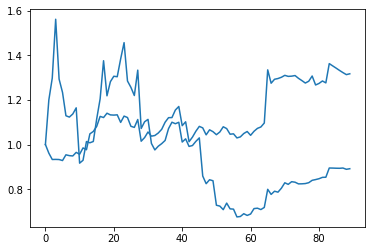

In [60]:
plt.plot(range(len(VARS)), VARS, c="C0")

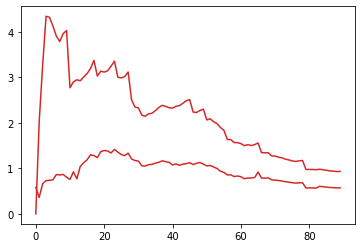

In [59]:
plt.plot(range(len(LENS)), LENS, c="C3")